___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 1 Data Cleaning

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

import warnings

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

/Users/sahindedogruer/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Settings

In [2]:
# Suppressing a warning 
warnings.filterwarnings("ignore") 

# It is a magic function that renders the figure in the notebook
#%matplotlib inline 
params = {
'figure.figsize':(14,7),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'w',
'boxplot.meanprops.markersize': 10.1,
}
# print(plt.style.library)
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.rcParams['figure.figsize'])

# Changing the figure size of a seaborn axes 
sns.set(rc={"figure.figsize": (10, 6)})

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 100)

## Reading scout_car.json file as a dataframe named df

In [3]:
df = pd.read_csv("filled_scout_s.csv")

### Creating a copy from df named df_copy

In [4]:
df_copy = df.copy()

## Checking the dataframe with head, tail and sample

In [5]:
# Checking the head of df

df.head()

make_model body_type  price               vat       km  prev_owner  type  \
0    Audi A1    Sedans  15770    VAT deductible  56013.0         2.0  Used   
1    Audi A1    Sedans  14500  Price negotiable  80000.0         1.0  Used   
2    Audi A1    Sedans  14640    VAT deductible  83450.0         1.0  Used   
3    Audi A1    Sedans  14500           Unknown  73000.0         1.0  Used   
4    Audi A1    Sedans  16790           Unknown  16200.0         1.0  Used   

  body_color paint_type  nr_of_doors  nr_of_seats gearing_type  cylinders  \
0      Black   Metallic          5.0          5.0    Automatic        3.0   
1        Red   Metallic          3.0          4.0    Automatic        4.0   
2      Black   Metallic          4.0          4.0    Automatic        4.0   
3      Brown   Metallic          3.0          4.0    Automatic        3.0   
4      Black   Metallic          5.0          5.0    Automatic        3.0   

  drive_chain     fuel  co_2_emission emission_class  \
0       front   Diesel           99.0         Euro 6   
1       front  Benzine          129.0         Euro 6   
2       front   Diesel           99.0         Euro 6   
3       front   Diesel           99.0         Euro 6   
4       front   Diesel          109.0         Euro 6   

                                 comfort_convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 entertainment_media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     safety_security  gears  hp_kW insp_new  \
0  ABS,Central door lock,Daytime running lights,D...    7.0   66.0      Yes   
1  ABS,Central door lock,Central door lock with r...    7.0  141.0       No   
2  ABS,Central door lock,Daytime running lights,D...    7.0   85.0       No   
3  ABS,Alarm system,Central door lock with remote...    6.0   66.0       No   
4  ABS,Central door lock,Driver-side airbag,Elect...    7.0   66.0      Yes   

   warranty_month upholstery_type upholstery_color  displacement_cc  \
0            12.0           Cloth            Black           1400.0   
1            12.0           Cloth             Grey           1800.0   
2            12.0           Cloth            Black           1600.0   
3            12.0           Cloth              NaN           1400.0   
4            12.0           Cloth            Black           1400.0   

   weight_kg  age  consumption_comb  
0     1220.0  3.0               3.8  
1     1255.0  2.0               5.6  
2     1135.0  3.0               3.8  
3     1195.0  3.0               3.8  
4     1135.0  3.0               4.1

In [6]:
# Checking the tail of df

df.tail()

make_model body_type  price             vat           km  \
15914  Renault Espace       Van  39950  VAT deductible    16.987484   
15915  Renault Espace       Van  39885  VAT deductible  9900.000000   
15916  Renault Espace       Van  39875  VAT deductible    15.000000   
15917  Renault Espace       Van  39700  VAT deductible    10.000000   
15918  Renault Espace       Van  40999  VAT deductible  3373.867550   

       prev_owner            type body_color paint_type  nr_of_doors  \
15914         0.0             New       Grey   Metallic          5.0   
15915         1.0            Used       Grey   Metallic          5.0   
15916         1.0  Pre-registered      White   Metallic          5.0   
15917         1.0  Pre-registered       Grey   Metallic          5.0   
15918         1.0   Demonstration       Grey   Metallic          5.0   

       nr_of_seats gearing_type  cylinders drive_chain     fuel  \
15914          5.0    Automatic        4.0       front   Diesel   
15915          5.0    Automatic        4.0       front  Benzine   
15916          7.0    Automatic        4.0       front   Diesel   
15917          7.0    Automatic        4.0       front   Diesel   
15918          5.0    Automatic        4.0         4WD  Benzine   

       co_2_emission emission_class  \
15914          139.0         Euro 6   
15915          168.0         Euro 6   
15916          139.0   Euro 6d-TEMP   
15917          139.0         Euro 6   
15918          153.0         Euro 6   

                                     comfort_convenience  \
15914  Air conditioning,Automatic climate control,Cru...   
15915  Air conditioning,Automatic climate control,Cru...   
15916  Air conditioning,Armrest,Automatic climate con...   
15917  Air conditioning,Automatic climate control,Cru...   
15918  Air conditioning,Automatic climate control,Cru...   

                                     entertainment_media  \
15914  Bluetooth,Digital radio,Hands-free equipment,O...   
15915  Bluetooth,Digital radio,Hands-free equipment,R...   
15916  Bluetooth,Hands-free equipment,On-board comput...   
15917                  Bluetooth,Digital radio,Radio,USB   
15918                                                USB   

                                        extras  \
15914                Alloy wheels,Touch screen   
15915  Alloy wheels,Touch screen,Voice Control   
15916                             Alloy wheels   
15917                Alloy wheels,Touch screen   
15918                Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kW  \
15914  ABS,Central door lock,Central door lock with r...    6.0  147.0   
15915  ABS,Adaptive Cruise Control,Blind spot monitor...    7.0  165.0   
15916  ABS,Adaptive Cruise Control,Blind spot monitor...    6.0  146.0   
15917  ABS,Blind spot monitor,Driver-side airbag,Elec...    6.0  147.0   
15918  ABS,Blind spot monitor,Daytime running lights,...    6.0  165.0   

      insp_new  warranty_month upholstery_type upholstery_color  \
15914      Yes            24.0    Full leather              NaN   
15915      Yes            24.0           Cloth            Black   
15916      Yes            24.0    Full leather            Black   
15917      Yes            24.0    Part leather            Black   
15918      Yes            24.0    Full leather            Brown   

       displacement_cc  weight_kg  age  consumption_comb  
15914           2000.0     1758.0  0.0               5.3  
15915           1800.0     1708.0  0.0               7.4  
15916           2000.0     1734.0  0.0               5.3  
15917           2000.0     1758.0  0.0               5.3  
15918           1800.0     1685.0  0.0               6.8

In [7]:
# Checking the df by taking samples

df.sample(10)

make_model      body_type  price             vat        km  \
14534  Renault Clio        Compact  10770  VAT deductible      10.0   
3700        Audi A3         Sedans  21900  VAT deductible   18100.0   
2255        Audi A1        Compact  20885  VAT deductible      15.0   
2855        Audi A3         Sedans  16500  VAT deductible  122584.0   
5393        Audi A3         Sedans  24300  VAT deductible      10.0   
6137     Opel Astra         Sedans  10750  VAT deductible   33208.0   
4189        Audi A3         Sedans  18990         Unknown   49000.0   
4362        Audi A3        Compact  16990         Unknown   23500.0   
7479     Opel Astra  Station wagon  14800  VAT deductible   27155.0   
206         Audi A1        Compact  16900  VAT deductible   67790.0   

       prev_owner            type body_color paint_type  nr_of_doors  \
14534         1.0  Pre-registered        Red   Metallic          5.0   
3700          1.0            Used      White   Metallic          5.0   
2255          1.0  Pre-registered      White   Metallic          5.0   
2855          1.0            Used       Grey   Metallic          5.0   
5393          1.0  Pre-registered       Grey   Metallic          5.0   
6137          1.0            Used      White   Metallic          5.0   
4189          1.0            Used      Black   Metallic          5.0   
4362          1.0            Used      Black   Metallic          5.0   
7479          1.0  Employee's car      Black   Metallic          5.0   
206           2.0            Used        Red   Metallic          3.0   

       nr_of_seats gearing_type  cylinders drive_chain     fuel  \
14534          5.0       Manual        4.0       front  Benzine   
3700           5.0    Automatic        4.0       front   Diesel   
2255           5.0       Manual        3.0       front  Benzine   
2855           5.0    Automatic        4.0       front   Diesel   
5393           5.0       Manual        4.0       front   Diesel   
6137           5.0       Manual        3.0       front  Benzine   
4189           5.0       Manual        4.0       front   Diesel   
4362           5.0       Manual        4.0       front   Diesel   
7479           5.0       Manual        4.0       front   Diesel   
206            5.0    Automatic        4.0       front   Diesel   

       co_2_emission emission_class  \
14534          133.0         Euro 6   
3700           103.0         Euro 6   
2255           111.0   Euro 6d-TEMP   
2855            99.0         Euro 6   
5393           114.0         Euro 6   
6137           125.0         Euro 6   
4189           106.0         Euro 6   
4362           105.0         Euro 6   
7479            95.0        Euro 6c   
206            104.0         Euro 6   

                                     comfort_convenience  \
14534  Cruise control,Electrical side mirrors,Power w...   
3700   Air conditioning,Automatic climate control,Pow...   
2255   Navigation system,Park Distance Control,Parkin...   
2855   Air conditioning,Automatic climate control,Cru...   
5393                                   Navigation system   
6137   Air conditioning,Cruise control,Electrical sid...   
4189   Air conditioning,Armrest,Automatic climate con...   
4362   Air conditioning,Armrest,Automatic climate con...   
7479   Air conditioning,Armrest,Automatic climate con...   
206    Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
14534                                  On-board computer   
3700                                           Bluetooth   
2255                                               Radio   
2855      Bluetooth,On-board computer,Radio,Sound system   
5393                      Bluetooth,Hands-free equipment   
6137   Bluetooth,Hands-free equipment,MP3,On-board co...   
4189         Bluetooth,CD player,On-board computer,Radio   
4362                   Bluetooth,On-board computer,Radio   
7479   Bluetooth,Digital radio,Hands-free equipment,M...   
206  

## Checking the summary information of df

In [8]:
# Checking the summary information of df with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  15919 non-null  object 
 4   km                   15919 non-null  float64
 5   prev_owner           15919 non-null  float64
 6   type                 15919 non-null  object 
 7   body_color           15919 non-null  object 
 8   paint_type           15919 non-null  object 
 9   nr_of_doors          15919 non-null  float64
 10  nr_of_seats          15919 non-null  float64
 11  gearing_type         15919 non-null  object 
 12  cylinders            15919 non-null  float64
 13  drive_chain          15919 non-null  object 
 14  fuel                 15919 non-null  object 
 15  co_2_emission        15919 non-null 

## Checking the null values of df

In [9]:
df.isnull().sum()

make_model                0
body_type                 0
price                     0
vat                       0
km                        0
prev_owner                0
type                      0
body_color                0
paint_type                0
nr_of_doors               0
nr_of_seats               0
gearing_type              0
cylinders                 0
drive_chain               0
fuel                      0
co_2_emission             0
emission_class            0
comfort_convenience       0
entertainment_media       0
extras                    0
safety_security           0
gears                     0
hp_kW                     0
insp_new                  0
warranty_month            0
upholstery_type           0
upholstery_color       4871
displacement_cc           0
weight_kg                 0
age                       0
consumption_comb          0
dtype: int64

## Checking the duplicated values in df

In [10]:
df.duplicated

# As it is seen below, there is not any duplicated values.

<bound method DataFrame.duplicated of            make_model body_type  price               vat            km  \
0             Audi A1    Sedans  15770    VAT deductible  56013.000000   
1             Audi A1    Sedans  14500  Price negotiable  80000.000000   
2             Audi A1    Sedans  14640    VAT deductible  83450.000000   
3             Audi A1    Sedans  14500           Unknown  73000.000000   
4             Audi A1    Sedans  16790           Unknown  16200.000000   
...               ...       ...    ...               ...           ...   
15914  Renault Espace       Van  39950    VAT deductible     16.987484   
15915  Renault Espace       Van  39885    VAT deductible   9900.000000   
15916  Renault Espace       Van  39875    VAT deductible     15.000000   
15917  Renault Espace       Van  39700    VAT deductible     10.000000   
15918  Renault Espace       Van  40999    VAT deductible   3373.867550   

       prev_owner            type body_color paint_type  nr_of_doors  \
0

# PART- 2 `( Handling With Missing Values )`

In [11]:
# Önceki dosyada

# PART- 3 `( Handling With Outliers )`

In [12]:
df_numeric = df.select_dtypes(exclude=['object'])
df_categoric = df.select_dtypes(include=['object'])

# Handling with Numeric Columns Outliers

In [13]:
#fig_ = df_numeric.hist(figsize=(15,100), layout=(15,3),
                        #bins=50, color='darkcyan', edgecolor='black', xlabelsize=8, ylabelsize=8)

## Plotting figures to check extreme values and deciding whether they are outlier or not 

### Box plot for numeric columns

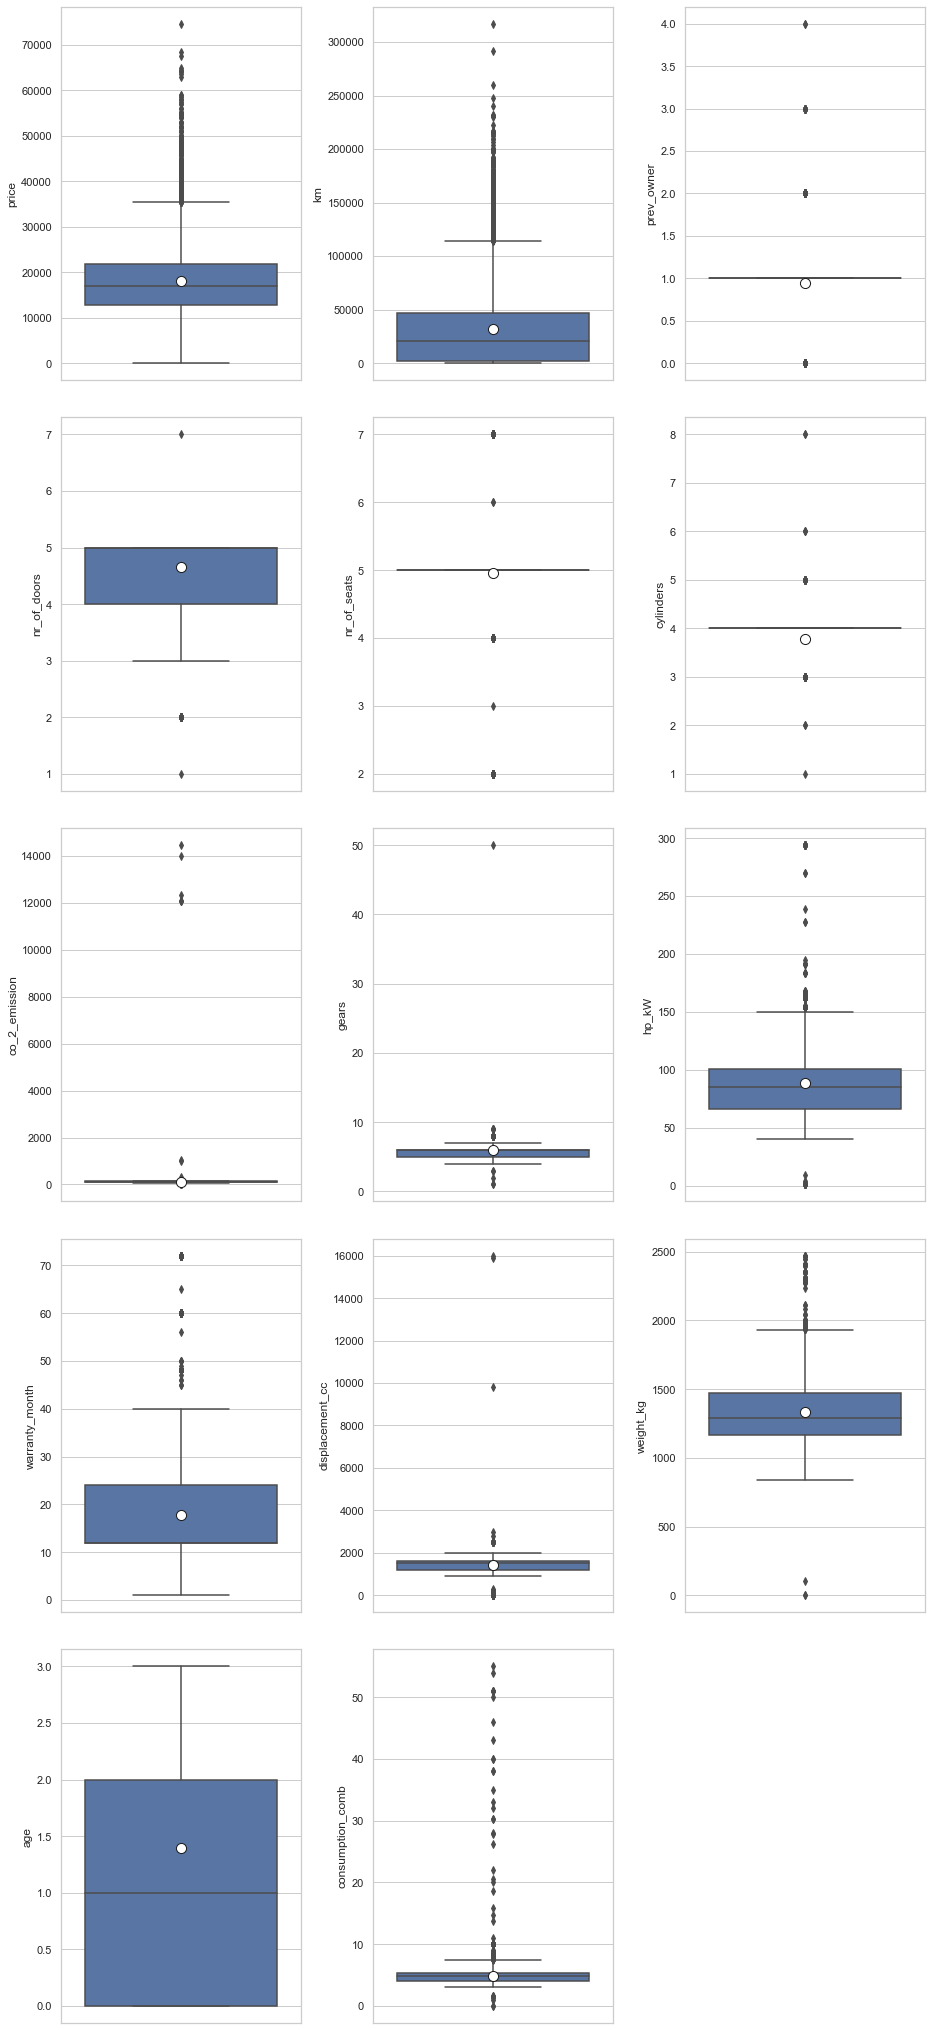

In [14]:
fig, axes = plt.subplots(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                   bottom=0.1,
                   right=0.9,
                   top=1.5
                   ,wspace=0.3,
                   hspace=0.1)


for i, col in enumerate(df_numeric.columns):
    plt.subplot(5,3,i+1)
    sns.boxplot(y=col, data=df_numeric)

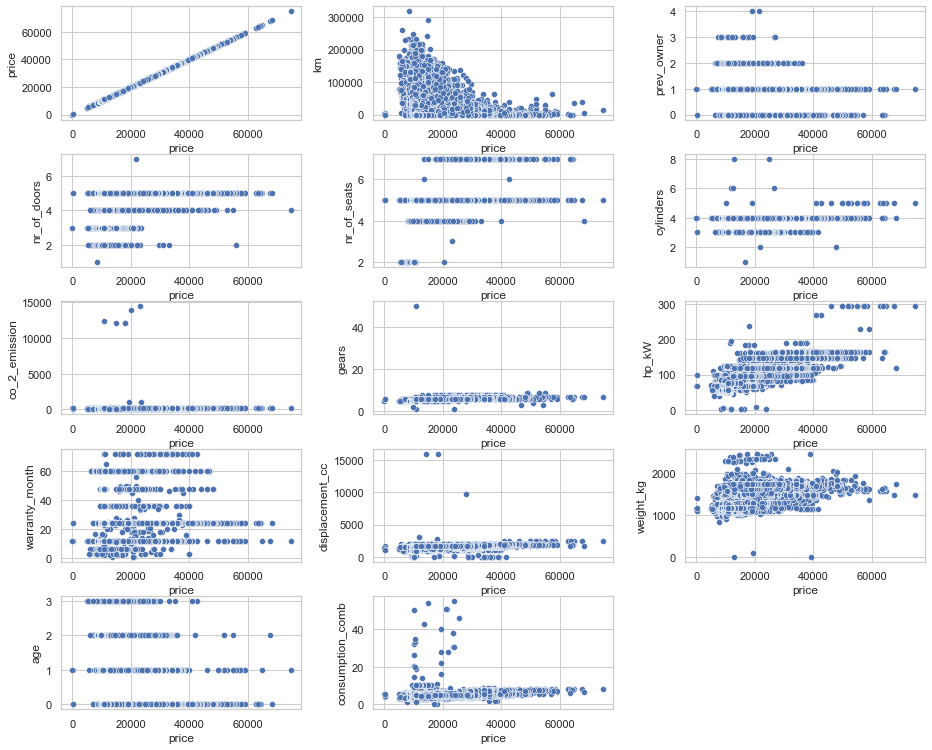

In [15]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(10,3,i+1)
        sns.scatterplot(x='price', y=col, data=df_numeric)

### Regplot for numeric columns

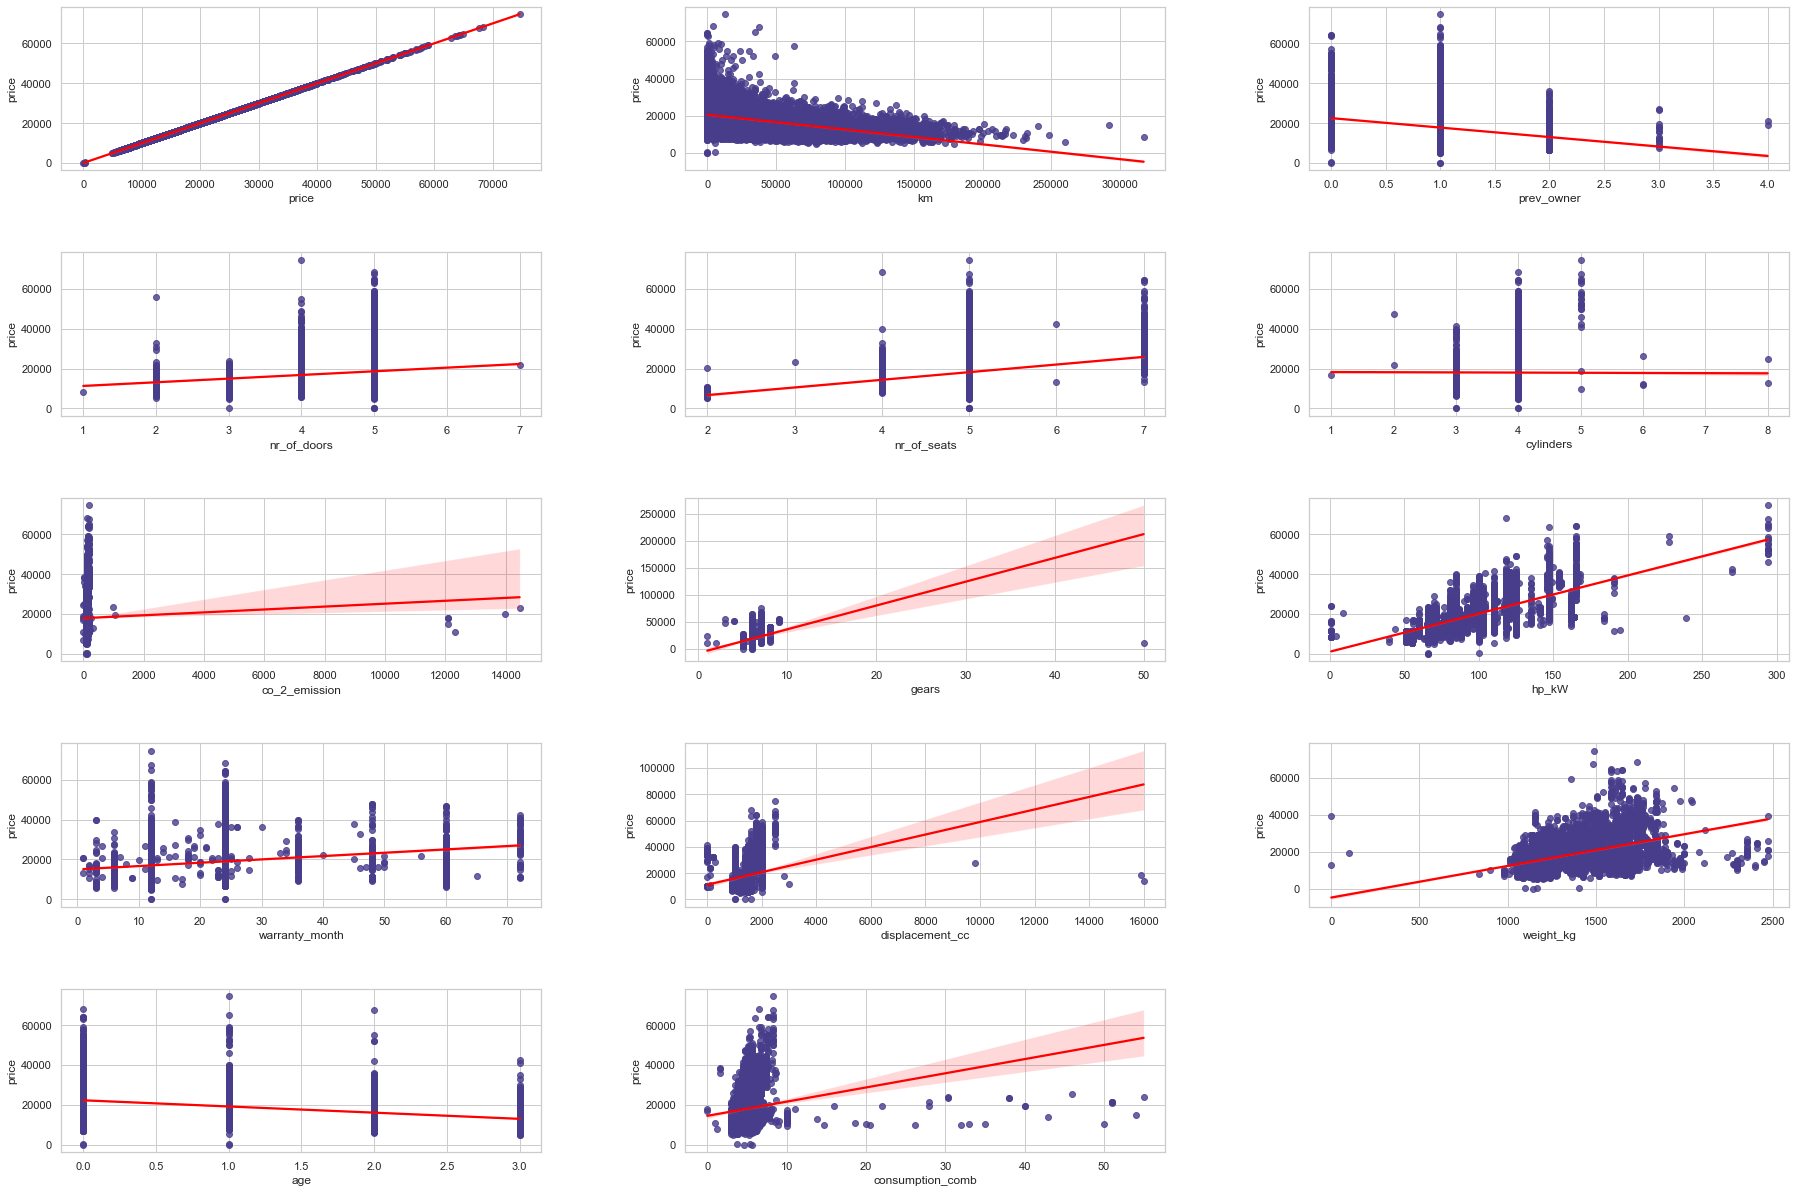

In [16]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "price", data=df_numeric, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

In [17]:
def iqr_lower_upper(col):
    q1=df_numeric[col].quantile(0.25)
    q3=df_numeric[col].quantile(0.75)
    iqr = q3-q1
    lower = q1 - 1.5*iqr
    upper = q3+1.5*iqr
    nr_of_extreme = df.loc[(df[col] < lower) &  (df[col]> upper)].shape[0]
    print (f'lower limit : {lower},\nupper limit : {upper}, \nnumber of extreme values : {nr_of_extreme}')
    return lower,upper

## nr_of_doors

In [18]:
df[df_numeric.nr_of_doors==1]

make_model body_type  price             vat       km  prev_owner  \
13782  Renault Clio   Compact   8500  VAT deductible  41493.0         1.0   

       type body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
13782  Used      White   Metallic          1.0          5.0       Manual   

       cylinders drive_chain    fuel  co_2_emission emission_class  \
13782        4.0       front  Diesel           85.0         Euro 6   

                                     comfort_convenience  \
13782  Air conditioning,Cruise control,Hill Holder,Mu...   

               entertainment_media        extras  \
13782  Bluetooth,On-board computer  Alloy wheels   

                                         safety_security  gears  hp_kW  \
13782  ABS,Central door lock,Daytime running lights,D...    5.0   55.0   

      insp_new  warranty_month upholstery_type upholstery_color  \
13782       No            12.0           Cloth              NaN   

       displacement_cc  weight_kg  age  consumption_comb  
13782           1500.0     1087.0  3.0               3.3

In [19]:
df_numeric.nr_of_doors.mode()

0    5.0
Name: nr_of_doors, dtype: float64

In [20]:
nr_of_doors_1 = df.loc[(df.make_model == 'Renault Clio')&(df.body_type=='Compact'),'nr_of_doors'].mode()[0]

In [21]:
df[df_numeric.nr_of_doors==2]

make_model body_type  price             vat       km  prev_owner  \
26        Audi A1   Compact  11444  VAT deductible  84029.0         1.0   
44        Audi A1    Sedans  11490  VAT deductible  44120.0         1.0   
48        Audi A1   Compact  11490         Unknown  58000.0         2.0   
55        Audi A1   Compact  10999  VAT deductible  69500.0         1.0   
56        Audi A1   Compact  10900  VAT deductible  43500.0         1.0   
...           ...       ...    ...             ...      ...         ...   
10304  Opel Corsa   Compact  10499         Unknown    325.0         0.0   
10314  Opel Corsa   Compact   9990  VAT deductible    100.0         0.0   
10380  Opel Corsa   Compact  11290  VAT deductible     12.0         1.0   
10413  Opel Corsa   Compact  11190  VAT deductible     10.0         1.0   
10444  Opel Corsa   Compact  10990  VAT deductible     12.0         1.0   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
26               Used       Blue   Metallic          2.0          4.0   
44               Used      Black   Metallic          2.0          5.0   
48               Used      Black   Metallic          2.0          4.0   
55               Used      Black   Metallic          2.0          4.0   
56               Used      White   Metallic          2.0          4.0   
...               ...        ...        ...          ...          ...   
10304             New        Red   Metallic          2.0          4.0   
10314             New       Blue   Metallic          2.0          5.0   
10380  Pre-registered        Red   Metallic          2.0          5.0   
10413  Pre-registered       Blue   Metallic          2.0          5.0   
10444  Pre-registered       Blue   Metallic          2.0          5.0   

      gearing_type  cylinders drive_chain     fuel  co_2_emission  \
26          Manual        3.0       front  Benzine           97.0   
44          Manual        3.0       front   Diesel           94.0   
48          Manual        3.0       front  Benzine          102.0   
55          Manual        3.0       front  Benzine          102.0   
56          Manual        3.0       front  Benzine           97.0   
...            ...        ...         ...      ...            ...   
10304       Manual        4.0       front  Benzine          126.0   
10314       Manual        4.0       front  Benzine          126.0   
10380       Manual        4.0       front  Benzine          126.0   
10413       Manual        4.0       front  Benzine          126.0   
10444       Manual        4.0       front  Benzine          126.0   

      emission_class                                comfort_convenience  \
26            Euro 6  Air conditioning,Automatic climate control,Ele...   
44            Euro 6  Air conditioning,Cruise control,Electrical sid...   
48            Euro 6  Air conditioning,Electrical side mirrors,Leath...   
55            Euro 5  Air conditioning,Armrest,Automatic climate con...   
56            Euro 6  Air conditioning,Electrical side mirrors,Power...   
...              ...                                                ...   
10304   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Power...   
10314   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Hill ...   
10380   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Power...   
10413   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Hill ...   
10444   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Power...   

                                     entertainment_media  \
26     Bluetooth,CD player,Hands-free equipment,MP3,O...   
44     Bluetooth,Hands-free equipment,MP3,On-board co...   
48                                   Bluetooth,CD player   
55                                             CD player   
56                     CD player,On-board computer,Radio   
...                                                  ...   
10304                                              Radio   
10314  Bluetooth,CD

In [22]:
df[df_numeric.nr_of_doors==7]

make_model body_type  price               vat       km  prev_owner  \
15202  Renault Espace       Van  21600  Price negotiable  78000.0         1.0   

       type body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
15202  Used      Brown   Metallic          7.0          5.0    Automatic   

       cylinders drive_chain    fuel  co_2_emission emission_class  \
15202        4.0       front  Diesel          120.0         Euro 6   

                                     comfort_convenience  \
15202  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
15202  Bluetooth,Digital radio,MP3,On-board computer,...   

                          extras  \
15202  Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kW  \
15202  ABS,Blind spot monitor,Central door lock,Dayti...    6.0  118.0   

      insp_new  warranty_month upholstery_type upholstery_color  \
15202       No            12.0    Full leather            Brown   

       displacement_cc  weight_kg  age  consumption_comb  
15202           1600.0     1734.0  3.0               4.6

In [23]:
nr_of_doors_7 = df.loc[(df.make_model == 'Renault Espace')&(df.body_type=='Van'),'nr_of_doors'].mode()[0]

In [24]:
df.nr_of_doors.replace(to_replace=[1,7], value=[nr_of_doors_1,nr_of_doors_7], inplace=True)

## nr_of_seats

In [25]:
df[df.nr_of_seats==6]

make_model      body_type  price             vat             km  \
582           Audi A1        Compact  13500  VAT deductible  100000.000000   
15890  Renault Espace  Station wagon  42490  VAT deductible      16.987484   

       prev_owner  type body_color paint_type  nr_of_doors  nr_of_seats  \
582           1.0  Used      White   Metallic          5.0          6.0   
15890         0.0   New      Black   Metallic          5.0          6.0   

      gearing_type  cylinders drive_chain     fuel  co_2_emission  \
582         Manual        4.0       front  Benzine          105.0   
15890    Automatic        4.0       front   Diesel          168.0   

      emission_class                                comfort_convenience  \
582           Euro 6                                   Air conditioning   
15890   Euro 6d-TEMP  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
582                                    On-board computer   
15890  Bluetooth,Hands-free equipment,On-board comput...   

                          extras  \
582                 Alloy wheels   
15890  Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kW  \
582                                                  ABS    5.0   70.0   
15890  ABS,Blind spot monitor,Central door lock,Dayti...    6.0  147.0   

      insp_new  warranty_month upholstery_type upholstery_color  \
582         No            12.0           Cloth              NaN   
15890      Yes            24.0           Cloth            Other   

       displacement_cc  weight_kg  age  consumption_comb  
582             1000.0     1500.0  2.0               4.3  
15890           2000.0     1840.0  0.0               5.7

In [26]:
df[df.nr_of_seats==3]

make_model body_type  price      vat      km  prev_owner  type  \
1636    Audi A1   Compact  23090  Unknown  9821.0         1.0  Used   

     body_color paint_type  nr_of_doors  nr_of_seats gearing_type  cylinders  \
1636      Black   Metallic          2.0          3.0    Automatic        4.0   

     drive_chain     fuel  co_2_emission emission_class  \
1636       front  Benzine          134.0         Euro 6   

                                    comfort_convenience  \
1636  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media  \
1636  Bluetooth,CD player,Digital radio,Hands-free e...   

                                                 extras  \
1636  Alloy wheels,Catalytic Converter,Sport package...   

                                        safety_security  gears  hp_kW  \
1636  ABS,Central door lock,Daytime running lights,D...    7.0  141.0   

     insp_new  warranty_month upholstery_type upholstery_color  \
1636      Yes            24.0    Part leather            Black   

      displacement_cc  weight_kg  age  consumption_comb  
1636           1800.0     1180.0  1.0               5.8

## displacement_cc 

In [27]:
iqr_lower_upper('displacement_cc')

lower limit : 600.0,
upper limit : 2200.0, 
number of extreme values : 0


(600.0, 2200.0)

In [28]:
df.groupby(['make_model','body_type']).displacement_cc.describe()

count         mean         std     min     25%  \
make_model     body_type                                                        
Audi A1        Compact        1039.0  1164.581328  353.861975   300.0  1000.0   
               Coupe             2.0  1300.000000  424.264069  1000.0  1150.0   
               Other            13.0  1092.307692  225.320285  1000.0  1000.0   
               Sedans         1538.0  1204.551365  251.667362  1000.0  1000.0   
               Station wagon    21.0  1285.714286  215.141150  1000.0  1000.0   
               Van               1.0  2000.000000         NaN  2000.0  2000.0   
Audi A2        Off-Road          1.0  1600.000000         NaN  1600.0  1600.0   
Audi A3        Compact         182.0  1515.384615  223.445187  1000.0  1400.0   
               Convertible       8.0  1812.500000  264.237447  1400.0  1575.0   
               Coupe             4.0  1450.000000  300.000000  1000.0  1450.0   
               Other            16.0  1487.500000  272.946881  1000.0  1400.0   
               Sedans         2605.0  1526.103647  284.132977  1000.0  1500.0   
               Station wagon   282.0  1425.177305  350.044436  1000.0  1000.0   
Opel Astra     Compact         185.0  1430.270270  239.456886  1000.0  1400.0   
               Coupe             2.0  1400.000000    0.000000  1400.0  1400.0   
               Off-Road          1.0  1400.000000         NaN  1400.0  1400.0   
               Other            67.0  1446.268657  201.003813  1000.0  1400.0   
               Sedans         1053.0  1343.874644  243.690322   100.0  1000.0   
               Station wagon  1218.0  1510.591133  445.495463   100.0  1400.0   
Opel Corsa     Compact        1232.0  1336.120130  100.375632   100.0  1200.0   
               Coupe            13.0  1230.769231  110.940039  1000.0  1200.0   
               Off-Road          3.0  1400.000000    0.000000  1400.0  1400.0   
               Other            87.0  1386.206897   59.400912  1000.0  1400.0   
               Sedans          875.0  1299.542857  100.113306  1000.0  1200.0   
               Transporter       7.0  1214.285714   37.796447  1200.0  1200.0   
               Van               2.0  1200.000000    0.000000  1200.0  1200.0   
Opel Insignia  Compact          27.0  1466.666667  443.760157     0.0  1500.0   
               Coupe             1.0  1600.000000         NaN  1600.0  1600.0   
               Off-Road          7.0  1871.428571  221.466971  1500.0  1800.0   
               Other            48.0  1625.000000  117.600116  1500.0  1600.0   
               Sedans          900.0  1640.111111  213.925618     0.0  1500.0   
               Station wagon  1614.0  1704.337051  454.985227     0.0  1500.0   
               Van               1.0  1500.000000         NaN  1500.0  1500.0   
Renault Clio   Compact         484.0  1166.528926  234.046980   900.0   900.0   
               Coupe             1.0  1600.000000         NaN  1600.0  1600.0   
               Off-Road          2.0  1350.000000  212.132034  1200.0  1275.0   
               Other            51.0  1145.098039  220.285020   900.0   900.0   
               Sedans          933.0  1285.316184  301.620857     0.0  1100.0   
               Station wagon   337.0  1297.626113  209.435898   900.0  1100.0   
               Transporter      29.0  1431.034483  179.490247   900.0  1500.0   
               Van               2.0  1500.000000    0.000000  1500.0  1500.0   
Renault Duster Off-Road         34.0  1694.117647  172.224618  1600.0  1600.0   
Renault Espace Compact           6.0  1633.333333   81.649658  1600.0  1600.0   
               Coupe             2.0  1600.000000    0.000000  1600.0  1600.0   
               Off-Road          8.0  1600.000000    0.000000  1600.0  1600.0   
               Other             8.0  1675.000000  148.804762  1600.0  1600.0   
               Sedans           21.0  1676.190476  148.002574  1600.0  1600.0   
               Station wagon    91.0  1663.736264  122.489440 

In [29]:
df[(df.displacement_cc < iqr_lower_upper('displacement_cc')[0]) | (df.displacement_cc > iqr_lower_upper('displacement_cc')[1])].count()

lower limit : 600.0,
upper limit : 2200.0, 
number of extreme values : 0
lower limit : 600.0,
upper limit : 2200.0, 
number of extreme values : 0


make_model             77
body_type              77
price                  77
vat                    77
km                     77
prev_owner             77
type                   77
body_color             77
paint_type             77
nr_of_doors            77
nr_of_seats            77
gearing_type           77
cylinders              77
drive_chain            77
fuel                   77
co_2_emission          77
emission_class         77
comfort_convenience    77
entertainment_media    77
extras                 77
safety_security        77
gears                  77
hp_kW                  77
insp_new               77
warranty_month         77
upholstery_type        77
upholstery_color       57
displacement_cc        77
weight_kg              77
age                    77
consumption_comb       77
dtype: int64

In [30]:
df[(df.displacement_cc < iqr_lower_upper('displacement_cc')[0]) | (df.displacement_cc > iqr_lower_upper('displacement_cc')[1])].isna().sum()

lower limit : 600.0,
upper limit : 2200.0, 
number of extreme values : 0
lower limit : 600.0,
upper limit : 2200.0, 
number of extreme values : 0


make_model              0
body_type               0
price                   0
vat                     0
km                      0
prev_owner              0
type                    0
body_color              0
paint_type              0
nr_of_doors             0
nr_of_seats             0
gearing_type            0
cylinders               0
drive_chain             0
fuel                    0
co_2_emission           0
emission_class          0
comfort_convenience     0
entertainment_media     0
extras                  0
safety_security         0
gears                   0
hp_kW                   0
insp_new                0
warranty_month          0
upholstery_type         0
upholstery_color       20
displacement_cc         0
weight_kg               0
age                     0
consumption_comb        0
dtype: int64

In [31]:
df[(df.displacement_cc > iqr_lower_upper("displacement_cc")[1])].sort_values(by = ["displacement_cc"], ascending = True).displacement_cc

lower limit : 600.0,
upper limit : 2200.0, 
number of extreme values : 0


3603      2500.0
3648      2500.0
3610      2500.0
3609      2500.0
3608      2500.0
3606      2500.0
3605      2500.0
3604      2500.0
3602      2500.0
3649      2500.0
3601      2500.0
3599      2500.0
3598      2500.0
3596      2500.0
3595      2500.0
3593      2500.0
3592      2500.0
3590      2500.0
3587      2500.0
3600      2500.0
10513     2800.0
10771     3000.0
1951      9800.0
7169     15900.0
10932    16000.0
Name: displacement_cc, dtype: float64

In [32]:
#fill extreme values with np.nan
df.loc[(df.displacement_cc <900)| (df.displacement_cc > 2500),'displacement_cc']=np.nan

In [33]:
df.displacement_cc.value_counts(dropna=False)

1600.0    5352
1400.0    3122
1000.0    2580
1500.0    1496
2000.0    1185
1200.0    1184
900.0      379
1100.0     289
1800.0     211
NaN         57
1300.0      39
2500.0      20
1700.0       3
1900.0       2
Name: displacement_cc, dtype: int64

In [34]:
#fill with mode
df['displacement_cc']=df.groupby(['make_model', 'body_type']).displacement_cc.apply(lambda x:x.fillna(x.mode()[0]))

In [35]:
#df.drop(index=df[(df.displacement_cc <900)| (df.displacement_cc > 2500)].index, inplace=True)

In [36]:
#df.shape

## cylinders

In [37]:
iqr_lower_upper('cylinders')

lower limit : 4.0,
upper limit : 4.0, 
number of extreme values : 0


(4.0, 4.0)

In [38]:
df.cylinders.value_counts()

4.0    12415
3.0     3474
5.0       22
6.0        3
8.0        2
2.0        2
1.0        1
Name: cylinders, dtype: int64

In [39]:
df[(df.cylinders <3)| (df.cylinders > 6)]

make_model      body_type  price             vat       km  \
535           Audi A1        Compact  12990         Unknown  41200.0   
9956       Opel Corsa        Compact  16625  VAT deductible    100.0   
11342   Opel Insignia  Station wagon  21900  VAT deductible  13600.0   
15055  Renault Espace            Van  24990         Unknown  47423.0   
15835  Renault Espace            Van  47590  VAT deductible   6000.0   

       prev_owner            type body_color paint_type  nr_of_doors  \
535           1.0            Used     Silver   Metallic          5.0   
9956          1.0  Pre-registered      Black   Metallic          3.0   
11342         1.0  Employee's car       Grey   Metallic          5.0   
15055         1.0            Used      Black   Metallic          5.0   
15835         1.0  Employee's car      Black   Metallic          5.0   

       nr_of_seats gearing_type  cylinders drive_chain     fuel  \
535            5.0       Manual        8.0       front  Benzine   
9956           5.0    Automatic        1.0       front  Benzine   
11342          5.0    Automatic        2.0       front   Diesel   
15055          5.0    Automatic        8.0       front   Diesel   
15835          7.0    Automatic        2.0       front   Diesel   

       co_2_emission emission_class  \
535            331.0         Euro 4   
9956           140.0   Euro 6d-TEMP   
11342          135.0         Euro 6   
15055          120.0         Euro 6   
15835          139.0   Euro 6d-TEMP   

                                     comfort_convenience  \
535    Air conditioning,Automatic climate control,Ele...   
9956   Air conditioning,Automatic climate control,Cru...   
11342  Air conditioning,Armrest,Automatic climate con...   
15055                              Park Distance Control   
15835  Air conditioning,Automatic climate control,Ele...   

                                     entertainment_media  \
535    Bluetooth,CD player,Hands-free equipment,On-bo...   
9956   Bluetooth,Digital radio,Hands-free equipment,M...   
11342  Bluetooth,Digital radio,Hands-free equipment,M...   
15055  Bluetooth,Digital radio,Hands-free equipment,O...   
15835  Bluetooth,Hands-free equipment,On-board comput...   

                                                  extras  \
535                             Ski bag,Sport suspension   
9956                       Alloy wheels,Sport suspension   
11342  Alloy wheels,Catalytic Converter,Touch screen,...   
15055                                       Alloy wheels   
15835                                      Voice Control   

                                         safety_security  gears  hp_kW  \
535    ABS,Alarm system,Central door lock,Driver-side...    5.0   70.0   
9956   ABS,Central door lock,Daytime running lights,D...    6.0   66.0   
11342  ABS,Central door lock with remote control,Driv...    6.0  100.0   
15055  ABS,Blind spot monitor,Central door lock,Dayti...    6.0  117.0   
15835  ABS,Alarm system,Blind spot monitor,Central do...    6.0  147.0   

      insp_new  warranty_month upholstery_type upholstery_color  \
535        Yes            12.0           Cloth            Black   
9956       Yes            24.0           Cloth            Black   
11342      Yes            12.0    Part leather            Black   
15055       No             3.0    Full leather              NaN   
15835      Yes            24.0    Full leather            Brown   

       displacement_cc  weight_kg  age  consumption_comb  
535             1000.0     1180.0  3.0              13.8  
9956            1400.0     1163.0  0.0               6.0  
11342           1600.0     1487.0  1.0               4.8  
15055           1600.0     1734.0  2.0               4.6  
15835           2000.0     1840.0  0.0               5.3

In [40]:
df[(df.cylinders <3)| (df.cylinders > 6)]

make_model      body_type  price             vat       km  \
535           Audi A1        Compact  12990         Unknown  41200.0   
9956       Opel Corsa        Compact  16625  VAT deductible    100.0   
11342   Opel Insignia  Station wagon  21900  VAT deductible  13600.0   
15055  Renault Espace            Van  24990         Unknown  47423.0   
15835  Renault Espace            Van  47590  VAT deductible   6000.0   

       prev_owner            type body_color paint_type  nr_of_doors  \
535           1.0            Used     Silver   Metallic          5.0   
9956          1.0  Pre-registered      Black   Metallic          3.0   
11342         1.0  Employee's car       Grey   Metallic          5.0   
15055         1.0            Used      Black   Metallic          5.0   
15835         1.0  Employee's car      Black   Metallic          5.0   

       nr_of_seats gearing_type  cylinders drive_chain     fuel  \
535            5.0       Manual        8.0       front  Benzine   
9956           5.0    Automatic        1.0       front  Benzine   
11342          5.0    Automatic        2.0       front   Diesel   
15055          5.0    Automatic        8.0       front   Diesel   
15835          7.0    Automatic        2.0       front   Diesel   

       co_2_emission emission_class  \
535            331.0         Euro 4   
9956           140.0   Euro 6d-TEMP   
11342          135.0         Euro 6   
15055          120.0         Euro 6   
15835          139.0   Euro 6d-TEMP   

                                     comfort_convenience  \
535    Air conditioning,Automatic climate control,Ele...   
9956   Air conditioning,Automatic climate control,Cru...   
11342  Air conditioning,Armrest,Automatic climate con...   
15055                              Park Distance Control   
15835  Air conditioning,Automatic climate control,Ele...   

                                     entertainment_media  \
535    Bluetooth,CD player,Hands-free equipment,On-bo...   
9956   Bluetooth,Digital radio,Hands-free equipment,M...   
11342  Bluetooth,Digital radio,Hands-free equipment,M...   
15055  Bluetooth,Digital radio,Hands-free equipment,O...   
15835  Bluetooth,Hands-free equipment,On-board comput...   

                                                  extras  \
535                             Ski bag,Sport suspension   
9956                       Alloy wheels,Sport suspension   
11342  Alloy wheels,Catalytic Converter,Touch screen,...   
15055                                       Alloy wheels   
15835                                      Voice Control   

                                         safety_security  gears  hp_kW  \
535    ABS,Alarm system,Central door lock,Driver-side...    5.0   70.0   
9956   ABS,Central door lock,Daytime running lights,D...    6.0   66.0   
11342  ABS,Central door lock with remote control,Driv...    6.0  100.0   
15055  ABS,Blind spot monitor,Central door lock,Dayti...    6.0  117.0   
15835  ABS,Alarm system,Blind spot monitor,Central do...    6.0  147.0   

      insp_new  warranty_month upholstery_type upholstery_color  \
535        Yes            12.0           Cloth            Black   
9956       Yes            24.0           Cloth            Black   
11342      Yes            12.0    Part leather            Black   
15055       No             3.0    Full leather              NaN   
15835      Yes            24.0    Full leather            Brown   

       displacement_cc  weight_kg  age  consumption_comb  
535             1000.0     1180.0  3.0              13.8  
9956            1400.0     1163.0  0.0               6.0  
11342           1600.0     1487.0  1.0               4.8  
15055           1600.0     1734.0  2.0               4.6  
15835           2000.0     1840.0  0.0               5.3

In [41]:
df.loc[(df.cylinders <3)| (df.cylinders > 6),'cylinders']=np.nan

In [42]:
#fill with mode
df['cylinders']=df.groupby(['make_model', 'body_type','displacement_cc']).cylinders.apply(lambda x:x.fillna(x.mode()[0]))

In [43]:
df.cylinders.value_counts(dropna=False)

4.0    12419
3.0     3475
5.0       22
6.0        3
Name: cylinders, dtype: int64

In [44]:
df.shape

(15919, 31)

## co_2_emission

In [45]:
iqr_lower_upper('co_2_emission')

lower limit : 68.0,
upper limit : 164.0, 
number of extreme values : 0


(68.0, 164.0)

In [46]:
df[(df.co_2_emission < iqr_lower_upper('co_2_emission')[0]) | (df.co_2_emission > iqr_lower_upper('co_2_emission')[1])]

lower limit : 68.0,
upper limit : 164.0, 
number of extreme values : 0
lower limit : 68.0,
upper limit : 164.0, 
number of extreme values : 0


make_model      body_type  price             vat            km  \
535           Audi A1        Compact  12990         Unknown  41200.000000   
3356          Audi A3        Compact  24950  VAT deductible  57000.000000   
3587          Audi A3         Sedans  64900         Unknown  35000.000000   
3590          Audi A3         Sedans  62900         Unknown    700.000000   
3592          Audi A3         Sedans  56900         Unknown   5200.000000   
...               ...            ...    ...             ...           ...   
15889  Renault Espace  Station wagon  42560  VAT deductible   4100.000000   
15890  Renault Espace  Station wagon  42490  VAT deductible     16.987484   
15900  Renault Espace            Van  41480  VAT deductible   8500.000000   
15907  Renault Espace            Van  39990  VAT deductible     50.000000   
15915  Renault Espace            Van  39885  VAT deductible   9900.000000   

       prev_owner           type body_color paint_type  nr_of_doors  \
535           1.0           Used     Silver   Metallic          5.0   
3356          1.0           Used       Blue   Metallic          5.0   
3587          1.0           Used       Grey   Metallic          5.0   
3590          1.0           Used       Grey   Metallic          5.0   
3592          1.0           Used       Grey   Metallic          5.0   
...           ...            ...        ...        ...          ...   
15889         1.0  Demonstration      Black   Metallic          5.0   
15890         0.0            New      Black   Metallic          5.0   
15900         1.0  Demonstration      Black   Metallic          5.0   
15907         0.0            New       Grey   Metallic          5.0   
15915         1.0           Used       Grey   Metallic          5.0   

       nr_of_seats    gearing_type  cylinders drive_chain     fuel  \
535            5.0          Manual        3.0       front  Benzine   
3356           5.0  Semi-automatic        4.0       front   Hybrit   
3587           5.0  Semi-automatic        5.0       front  Benzine   
3590           5.0  Semi-automatic        5.0       front  Benzine   
3592           5.0  Semi-automatic        5.0         4WD  Benzine   
...            ...             ...        ...         ...      ...   
15889          7.0       Automatic        4.0       front  Benzine   
15890          6.0       Automatic        4.0       front   Diesel   
15900          7.0       Automatic        4.0       front  Benzine   
15907          7.0       Automatic        4.0       front  Benzine   
15915          5.0       Automatic        4.0       front  Benzine   

       co_2_emission emission_class  \
535            331.0         Euro 4   
3356            36.0         Euro 6   
3587           189.0         Euro 6   
3590           194.0   Euro 6d-TEMP   
3592           189.0         Euro 6   
...              ...            ...   
15889          168.0         Euro 6   
15890          168.0   Euro 6d-TEMP   
15900          175.0         Euro 6   
15907          168.0   Euro 6d-TEMP   
15915          168.0         Euro 6   

                                     comfort_convenience  \
535    Air conditioning,Automatic climate control,Ele...   
3356   Air conditioning,Armrest,Automatic climate con...   
3587   Air conditioning,Seat ventilation,Split rear s...   
3590   Air conditioning,Seat ventilation,Split rear s...   
3592   Air conditioning,Air suspension,Armrest,Automa...   
...                                                  ...   
15889  Cruise control,Electrically adjustable seats,E...   
15890  Air conditioning,Armrest,Automatic climate con...   
15900  Air conditioning,Automatic climate control,Cru...   
15907  Air conditioning,Armrest,Automatic climate con...   
15915  Air conditioning,Automatic climate control,Cru...   

                                     entertainment_media  \
535    Bluetooth,CD player,Hands-free equipment,On-bo...   
3356   Bluetooth,CD player,Digital radio,Hands-free e...   
3587                  

In [47]:
df[(df.co_2_emission <36)| (df.co_2_emission > 330)]

make_model      body_type  price             vat            km  \
535           Audi A1        Compact  12990         Unknown  41200.000000   
4089          Audi A3         Sedans  19500  VAT deductible  23644.000000   
4556          Audi A3         Sedans  23500  VAT deductible  27815.000000   
5818       Opel Astra         Sedans  14990  VAT deductible  85182.000000   
6397       Opel Astra         Sedans   6950         Unknown  88000.000000   
6578       Opel Astra  Station wagon  17850  VAT deductible  29900.000000   
6579       Opel Astra  Station wagon  17850  VAT deductible  29900.000000   
8110       Opel Astra  Station wagon  18380  VAT deductible   1020.000000   
8217       Opel Astra         Sedans  17850  VAT deductible   4500.000000   
8542       Opel Corsa        Compact  10950  VAT deductible  34800.000000   
10566   Opel Insignia  Station wagon  16900  VAT deductible  59800.000000   
11553   Opel Insignia  Station wagon  18900         Unknown  34386.000000   
11888   Opel Insignia  Station wagon  22990  VAT deductible  25583.000000   
12343   Opel Insignia         Sedans  19950  VAT deductible  15018.000000   
13008   Opel Insignia          Other  24700         Unknown   9800.000000   
14902  Renault Duster       Off-Road  10850         Unknown     16.987484   

       prev_owner            type body_color paint_type  nr_of_doors  \
535           1.0            Used     Silver   Metallic          5.0   
4089          1.0            Used       Blue   Metallic          5.0   
4556          1.0            Used       Grey   Metallic          5.0   
5818          1.0            Used      Brown   Metallic          5.0   
6397          1.0            Used       Grey   Metallic          5.0   
6578          1.0            Used      Green   Metallic          5.0   
6579          1.0            Used      Green   Metallic          5.0   
8110          1.0            Used     Silver   Metallic          5.0   
8217          1.0  Employee's car        Red   Metallic          5.0   
8542          2.0            Used       Blue   Metallic          3.0   
10566         1.0            Used      Black   Metallic          5.0   
11553         1.0            Used       Grey   Metallic          5.0   
11888         1.0            Used       Grey   Metallic          5.0   
12343         1.0            Used      White   Metallic          5.0   
13008         1.0            Used       Blue   Metallic          5.0   
14902         0.0             New      White  Uni/basic          5.0   

       nr_of_seats gearing_type  cylinders drive_chain     fuel  \
535            5.0       Manual        3.0       front  Benzine   
4089           5.0       Manual        4.0       front   Diesel   
4556           5.0    Automatic        4.0       front   Diesel   
5818           5.0    Automatic        4.0       front  Benzine   
6397           5.0       Manual        4.0       front   Diesel   
6578           5.0    Automatic        4.0       front  Benzine   
6579           5.0    Automatic        4.0       front  Benzine   
8110           5.0       Manual        3.0       front  Benzine   
8217           5.0       Manual        4.0       front  Benzine   
8542           5.0    Automatic        4.0       front  Benzine   
10566          5.0    Automatic        4.0       front   Diesel   
11553          5.0       Manual        4.0       front   Diesel   
11888          5.0    Automatic        4.0       front  Benzine   
12343          5.0       Manual        4.0       front  Benzine   
13008          5.0       Manual        4.0       front   Diesel   
14902          5.0       Manual        4.0         4WD  Benzine   

       co_2_emission emission_class  \
535            331.0         Euro 4   
4089          1060.0         Euro 6   
4556           990.0         Euro 6   
5818         12087.0         Euro 6   
6397             5.0         Euro 6   
6578         12087.0         Euro 6   
6579         12087.0         Euro 6   
8110            14.0    

In [48]:
cond=((df.co_2_emission <36)| (df.co_2_emission > 330))

df.loc[cond, 'co_2_emission'] =np.nan

In [49]:
df.co_2_emission.isna().sum()

16

In [50]:
#fill with median
df['co_2_emission']=df.groupby(['make_model', 'body_type']).co_2_emission.apply(lambda x:x.fillna(x.median()))

In [51]:
df.shape

(15919, 31)

## gears

In [52]:
iqr_lower_upper('gears')

lower limit : 3.5,
upper limit : 7.5, 
number of extreme values : 0


(3.5, 7.5)

In [53]:
df[(df.make_model == 'Renault Espace') & (df.body_type == "Van")][['gears']].value_counts()

gears
6.0      688
7.0      105
9.0        6
3.0        2
4.0        2
dtype: int64

In [54]:
cond=((df.gears==50)|(df.gears <5))

df.loc[cond, 'gears'] =np.nan

In [55]:
df.gears.isna().sum()

8

In [56]:
#fill with median
df['gears']=df.groupby(['make_model', 'body_type','gearing_type']).gears.apply(lambda x:x.fillna(x.median()))

In [57]:
df.shape

(15919, 31)

## hp_kW

In [58]:
iqr_lower_upper('hp_kW')

lower limit : 13.5,
upper limit : 153.5, 
number of extreme values : 0


(13.5, 153.5)

In [59]:
df[df.hp_kW <40]

make_model      body_type  price      vat       km  prev_owner  \
3913          Audi A3         Sedans  20440  Unknown  24000.0         1.0   
6005       Opel Astra  Station wagon  11600  Unknown  73860.0         1.0   
6034       Opel Astra  Station wagon  11600  Unknown  76010.0         1.0   
6946       Opel Astra  Station wagon  11900  Unknown  70090.0         1.0   
7014       Opel Astra         Sedans  11700  Unknown  79993.0         1.0   
7016       Opel Astra         Sedans  11700  Unknown  62384.0         1.0   
7018       Opel Astra         Sedans  11700  Unknown  77272.0         1.0   
7019       Opel Astra         Sedans  11700  Unknown  69035.0         1.0   
9285       Opel Corsa         Sedans   8300  Unknown  58912.0         1.0   
9287       Opel Corsa         Sedans   8300  Unknown  53522.0         1.0   
9288       Opel Corsa         Sedans   8300  Unknown  60386.0         1.0   
9289       Opel Corsa         Sedans   8300  Unknown  59217.0         1.0   
9290       Opel Corsa         Sedans   8300  Unknown  51318.0         1.0   
9292       Opel Corsa         Sedans   8300  Unknown  53390.0         1.0   
9299       Opel Corsa         Sedans   8300  Unknown  47140.0         1.0   
10468   Opel Insignia  Station wagon  15300  Unknown  77125.0         1.0   
10579   Opel Insignia  Station wagon  16400  Unknown  78762.0         1.0   
10580   Opel Insignia  Station wagon  16400  Unknown  68525.0         1.0   
10610   Opel Insignia  Station wagon  15300  Unknown  62800.0         1.0   
13885    Renault Clio        Compact   8990  Unknown   9751.0         1.0   
15155  Renault Espace         Sedans  23800  Unknown  56340.0         1.0   
15156  Renault Espace         Sedans  23800  Unknown  69600.0         1.0   

       type body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
3913   Used      Black   Metallic          5.0          5.0    Automatic   
6005   Used      Black   Metallic          5.0          5.0    Automatic   
6034   Used     Silver   Metallic          5.0          5.0    Automatic   
6946   Used      Black   Metallic          5.0          5.0       Manual   
7014   Used     Silver   Metallic          5.0          5.0       Manual   
7016   Used      Black   Metallic          5.0          5.0       Manual   
7018   Used      Black   Metallic          5.0          5.0       Manual   
7019   Used      Black   Metallic          5.0          5.0       Manual   
9285   Used      Black   Metallic          5.0          5.0       Manual   
9287   Used     Silver   Metallic          5.0          5.0       Manual   
9288   Used     Silver   Metallic          5.0          5.0       Manual   
9289   Used     Silver   Metallic          5.0          5.0       Manual   
9290   Used     Silver   Metallic          5.0          5.0       Manual   
9292   Used     Silver   Metallic          5.0          5.0       Manual   
9299   Used      Black   Metallic          5.0          5.0       Manual   
10468  Used      Black   Metallic          5.0          5.0    Automatic   
10579  Used     Silver   Metallic          5.0          5.0    Automatic   
10580  Used     Silver   Metallic          5.0          5.0    Automatic   
10610  Used     Silver   Metallic          5.0          5.0    Automatic   
13885  Used       Grey   Metallic          5.0          5.0       Manual   
15155  Used       Grey   Metallic          5.0          5.0    Automatic   
15156  Used      Black   Metallic          5.0          5.0    Automatic   

       cylinders drive_chain     fuel  co_2_emission emission_class  \
3913         4.0       front   Diesel          105.0         Euro 6   
6005         3.0       front  Benzine          125.0         Euro 6   
6034         3.0       front  Benzine          125.0         Euro 6   
6946         4.0       front   Diesel          101.0         Euro 6   
7014         4.0       front  Benzine          125.0         Euro 6   
7016         4.0       front  Benzine          125.0         Eur

In [60]:
df.hp_kW.value_counts().sort_index()

1.0        20
4.0         1
9.0         1
40.0        2
44.0        1
51.0      695
52.0       22
53.0        2
54.0      276
55.0      569
56.0      310
57.0       10
60.0      160
63.0        2
65.0        4
66.0     2124
67.0       40
70.0      889
71.0       59
74.0       81
75.0        1
76.0        4
77.0      345
78.0       20
80.0        3
81.0     1402
82.0       22
84.0        1
85.0     2557
86.0        2
87.0      236
88.0      177
89.0        2
90.0        4
92.0      466
93.0        3
96.0       72
98.0        3
100.0    1311
101.0      47
103.0     253
104.0       8
110.0    1114
112.0       7
115.0       1
117.0       6
118.0     547
119.0      30
120.0       8
121.0     393
122.0      35
123.0       1
125.0     709
127.0       2
132.0       1
133.0       1
135.0      24
137.0       1
140.0       2
141.0      16
143.0       2
146.0      18
147.0     383
149.0       3
150.0       2
154.0      39
155.0       6
162.0      98
163.0       1
164.0      27
165.0     194
167.0 

In [61]:
cond=((df.hp_kW <50))

In [62]:
df.loc[cond, 'hp_kW'] =np.nan

In [63]:
df.hp_kW.isna().sum()

25

In [64]:
#fill with median
df['hp_kW']=df.groupby(['make_model','displacement_cc','cylinders','fuel']).hp_kW.apply(lambda x:x.fillna(x.median()))



In [65]:
df['hp_kW'].value_counts()

85.0     2557
66.0     2126
81.0     1403
100.0    1315
110.0    1119
70.0      889
125.0     709
51.0      702
55.0      569
118.0     549
92.0      466
121.0     393
147.0     383
77.0      347
56.0      311
54.0      276
103.0     253
87.0      237
165.0     194
88.0      177
60.0      160
162.0      98
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
52.0       22
82.0       22
78.0       20
294.0      18
146.0      18
141.0      16
57.0       10
104.0       8
120.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
90.0        4
76.0        4
65.0        4
80.0        3
93.0        3
168.0       3
149.0       3
98.0        3
150.0       2
228.0       2
53.0        2
270.0       2
86.0        2
167.0       2
63.0        2
127.0       2
89.0        2
143.0       2
140.0       2
115.0       1
132.0       1
239.0       1
163.0       1
75.0        1
133.0       1
123.0 

## weight_kg

In [66]:
iqr_lower_upper('weight_kg')

lower limit : 704.5,
upper limit : 1932.5, 
number of extreme values : 0


(704.5, 1932.5)

In [67]:
df[df.weight_kg <iqr_lower_upper('weight_kg')[0]].shape

lower limit : 704.5,
upper limit : 1932.5, 
number of extreme values : 0


(3, 31)

In [68]:
df[df.weight_kg <iqr_lower_upper('weight_kg')[0]]

lower limit : 704.5,
upper limit : 1932.5, 
number of extreme values : 0


make_model      body_type  price             vat      km  \
1143         Audi A1        Compact  19229  VAT deductible  8263.0   
8355      Opel Corsa        Compact  12945         Unknown  2015.0   
12779  Opel Insignia  Station wagon  39299  VAT deductible    10.0   

       prev_owner  type body_color paint_type  nr_of_doors  nr_of_seats  \
1143          1.0  Used      Beige   Metallic          5.0          4.0   
8355          1.0  Used     Silver   Metallic          5.0          5.0   
12779         0.0   New      Black   Metallic          5.0          5.0   

      gearing_type  cylinders drive_chain     fuel  co_2_emission  \
1143     Automatic        3.0       front  Benzine          102.0   
8355     Automatic        4.0       front  Benzine          112.0   
12779       Manual        4.0       front  Benzine          139.0   

      emission_class                                comfort_convenience  \
1143          Euro 6  Air conditioning,Armrest,Automatic climate con...   
8355          Euro 6  Air conditioning,Electrical side mirrors,Hill ...   
12779         Euro 6  Heated steering wheel,Hill Holder,Park Distanc...   

                                     entertainment_media  \
1143   Bluetooth,CD player,Hands-free equipment,MP3,O...   
8355                                               Radio   
12779  Bluetooth,Digital radio,Hands-free equipment,O...   

                                                  extras  \
1143   Alloy wheels,Catalytic Converter,Sport seats,S...   
8355                                 Catalytic Converter   
12779                             Alloy wheels,Roof rack   

                                         safety_security  gears  hp_kW  \
1143   ABS,Central door lock,Daytime running lights,D...    7.0   70.0   
8355   ABS,Central door lock,Daytime running lights,D...    5.0   66.0   
12779           Fog lights,Lane departure warning system    6.0  121.0   

      insp_new  warranty_month upholstery_type upholstery_color  \
1143       Yes            36.0           Cloth            Black   
8355       Yes            12.0           Cloth            Black   
12779      Yes            24.0           Cloth            Black   

       displacement_cc  weight_kg  age  consumption_comb  
1143            1000.0      102.0  1.0               4.6  
8355            1400.0        1.0  1.0               4.8  
12779           1500.0        1.0  0.0               6.3

In [69]:
df[df.weight_kg <100]

make_model      body_type  price             vat      km  \
8355      Opel Corsa        Compact  12945         Unknown  2015.0   
12779  Opel Insignia  Station wagon  39299  VAT deductible    10.0   

       prev_owner  type body_color paint_type  nr_of_doors  nr_of_seats  \
8355          1.0  Used     Silver   Metallic          5.0          5.0   
12779         0.0   New      Black   Metallic          5.0          5.0   

      gearing_type  cylinders drive_chain     fuel  co_2_emission  \
8355     Automatic        4.0       front  Benzine          112.0   
12779       Manual        4.0       front  Benzine          139.0   

      emission_class                                comfort_convenience  \
8355          Euro 6  Air conditioning,Electrical side mirrors,Hill ...   
12779         Euro 6  Heated steering wheel,Hill Holder,Park Distanc...   

                                     entertainment_media  \
8355                                               Radio   
12779  Bluetooth,Digital radio,Hands-free equipment,O...   

                       extras  \
8355      Catalytic Converter   
12779  Alloy wheels,Roof rack   

                                         safety_security  gears  hp_kW  \
8355   ABS,Central door lock,Daytime running lights,D...    5.0   66.0   
12779           Fog lights,Lane departure warning system    6.0  121.0   

      insp_new  warranty_month upholstery_type upholstery_color  \
8355       Yes            12.0           Cloth            Black   
12779      Yes            24.0           Cloth            Black   

       displacement_cc  weight_kg  age  consumption_comb  
8355            1400.0        1.0  1.0               4.8  
12779           1500.0        1.0  0.0               6.3

In [70]:
cond=((df.weight_kg <iqr_lower_upper('weight_kg')[0]))

df.loc[cond, 'weight_kg'] =np.nan

df.weight_kg.isna().sum()

lower limit : 704.5,
upper limit : 1932.5, 
number of extreme values : 0


3

In [71]:
#fill with mode
df['weight_kg']=df.groupby(['make_model','body_type']).weight_kg.apply(lambda x:x.fillna(x.mode()[0]))



In [72]:
df['weight_kg'].value_counts().head(10)

1163.0    1592
1360.0    1406
1487.0     956
1135.0     826
1425.0     731
1180.0     695
1273.0     656
1165.0     586
1503.0     570
1734.0     551
Name: weight_kg, dtype: int64

## consumption_comb

In [73]:
iqr_lower_upper('consumption_comb')

lower limit : 2.0250000000000012,
upper limit : 7.425, 
number of extreme values : 0


(2.0250000000000012, 7.425)

In [74]:
df[df.consumption_comb < iqr_lower_upper('consumption_comb')[0]]

lower limit : 2.0250000000000012,
upper limit : 7.425, 
number of extreme values : 0


make_model      body_type  price               vat            km  \
3612          Audi A3         Sedans  38450  Price negotiable  13800.000000   
3615          Audi A3         Sedans  35899           Unknown  20880.000000   
3617          Audi A3         Sedans  38000  Price negotiable  12000.000000   
8217       Opel Astra         Sedans  17850    VAT deductible   4500.000000   
10566   Opel Insignia  Station wagon  16900    VAT deductible  59800.000000   
13678    Renault Clio       Off-Road   7700           Unknown  95000.000000   
14902  Renault Duster       Off-Road  10850           Unknown     16.987484   

       prev_owner            type body_color paint_type  nr_of_doors  \
3612          1.0            Used      Black   Metallic          5.0   
3615          1.0            Used      White   Metallic          5.0   
3617          1.0            Used       Grey   Metallic          5.0   
8217          1.0  Employee's car        Red   Metallic          5.0   
10566         1.0            Used      Black   Metallic          5.0   
13678         1.0            Used      White   Metallic          5.0   
14902         0.0             New      White  Uni/basic          5.0   

       nr_of_seats    gearing_type  cylinders drive_chain     fuel  \
3612           5.0  Semi-automatic        4.0       front   Hybrit   
3615           5.0  Semi-automatic        4.0       front   Hybrit   
3617           5.0  Semi-automatic        4.0       front   Hybrit   
8217           5.0          Manual        4.0       front  Benzine   
10566          5.0       Automatic        4.0       front   Diesel   
13678          5.0          Manual        4.0       front   Diesel   
14902          5.0          Manual        4.0         4WD  Benzine   

       co_2_emission emission_class  \
3612            36.0         Euro 6   
3615            36.0         Euro 6   
3617            36.0         Euro 6   
8217           120.5   Euro 6d-TEMP   
10566          139.0         Euro 6   
13678           85.0         Euro 6   
14902          186.0         Euro 4   

                                     comfort_convenience  \
3612   Air conditioning,Armrest,Automatic climate con...   
3615   Air conditioning,Power windows,Seat ventilatio...   
3617   Air conditioning,Armrest,Automatic climate con...   
8217   Air conditioning,Armrest,Automatic climate con...   
10566  Air conditioning,Armrest,Automatic climate con...   
13678  Air conditioning,Cruise control,Electrical sid...   
14902                     Air conditioning,Power windows   

                                     entertainment_media  \
3612   Bluetooth,CD player,Digital radio,Hands-free e...   
3615                                     Bluetooth,Radio   
3617   Bluetooth,CD player,Digital radio,Hands-free e...   
8217   Bluetooth,Hands-free equipment,MP3,On-board co...   
10566                            On-board computer,Radio   
13678  Bluetooth,CD player,Digital radio,Hands-free e...   
14902                            On-board computer,Radio   

                                                  extras  \
3612   Alloy wheels,Sport package,Sport seats,Voice C...   
3615                                        Alloy wheels   
3617   Alloy wheels,Shift paddles,Sport package,Sport...   
8217                          Touch screen,Voice Control   
10566                          Alloy wheels,Touch screen   
13678  Catalytic Converter,Sport package,Sport seats,...   
14902                                          Roof rack   

                                         safety_security  gears  hp_kW  \
3612   ABS,Adaptive Cruise Control,Alarm system,Centr...    6.0  110.0   
3615   ABS,Adaptive Cruise Control,Alarm system,Centr...    6.0  110.0   
3617   ABS,Adaptive Cruise Control,Adaptive headlight...    6.0  110.0   
8217   ABS,Central door lock,Driver-side airbag,Elect...    6.0   92.0   
10566  ABS,Adaptive headlights,Daytime running lights...    6.0  125.0   
13678  ABS,Adaptive Cruise Control,Alarm

In [75]:
df[df.consumption_comb > iqr_lower_upper('consumption_comb')[1]].sort_values(by='consumption_comb').tail(50)

lower limit : 2.0250000000000012,
upper limit : 7.425, 
number of extreme values : 0


make_model      body_type  price             vat             km  \
14920  Renault Duster       Off-Road  11900         Unknown     101.000000   
14921  Renault Duster       Off-Road  12000         Unknown      16.987484   
14922  Renault Duster       Off-Road  11900         Unknown      16.987484   
14923  Renault Duster       Off-Road  11900         Unknown     101.000000   
14924  Renault Duster       Off-Road  10900         Unknown      16.987484   
14925  Renault Duster       Off-Road  10900         Unknown     101.000000   
14926  Renault Duster       Off-Road  10900         Unknown     101.000000   
14927  Renault Duster       Off-Road  10900         Unknown      16.987484   
2801          Audi A3         Sedans  17490         Unknown   71900.000000   
14918  Renault Duster       Off-Road  12250         Unknown      16.987484   
14904  Renault Duster       Off-Road  14399  VAT deductible      16.987484   
14903  Renault Duster       Off-Road  14399  VAT deductible     101.000000   
14901  Renault Duster       Off-Road  13250         Unknown     101.000000   
14900  Renault Duster       Off-Road  13250         Unknown      16.987484   
14899  Renault Duster       Off-Road  13250         Unknown     101.000000   
14898  Renault Duster       Off-Road  16033  VAT deductible     101.000000   
14897  Renault Duster       Off-Road  16033  VAT deductible      16.987484   
14896  Renault Duster       Off-Road  16033  VAT deductible     101.000000   
14895  Renault Duster       Off-Road  16033  VAT deductible      16.987484   
14894  Renault Duster       Off-Road  13250         Unknown      16.987484   
13894    Renault Clio         Sedans   9490         Unknown   26000.000000   
10513   Opel Insignia  Station wagon  17990  VAT deductible  145000.000000   
535           Audi A1        Compact  12990         Unknown   41200.000000   
14136    Renault Clio         Sedans   9980  VAT deductible   51837.000000   
4100          Audi A3         Sedans  19499  VAT deductible   28556.000000   
14532    Renault Clio         Sedans  10790         Unknown      10.000000   
14610    Renault Clio        Compact  10490         Unknown      10.000000   
14135    Renault Clio         Sedans   9980  VAT deductible      10.000000   
4090          Audi A3         Sedans  19500         Unknown   32000.000000   
14134    Renault Clio         Sedans   9980  VAT deductible      10.000000   
2197          Audi A1         Sedans  21700  VAT deductible      16.987484   
4101          Audi A3         Sedans  19499  VAT deductible   28874.000000   
11935   Opel Insignia         Sedans  23325  VAT deductible   19850.000000   
11978   Opel Insignia         Sedans  23825  VAT deductible   20550.000000   
14131    Renault Clio         Sedans   9990  VAT deductible   68652.000000   
14530    Renault Clio         Sedans  10590         Unknown   63941.000000   
14608    Renault Clio        Compact  10490  VAT deductible       6.000000   
4556          Audi A3         Sedans  23500  VAT deductible   27815.000000   
4558          Audi A3         Sedans  23500  VAT deductible   27815.000000   
4102          Audi A3         Sedans  19500  VAT deductible   23644.000000   
4089          Audi A3         Sedans  19500  VAT deductible   23644.000000   
500           Audi A1         Sedans  13719  VAT deductible   31255.000000   
15067  Renault Espace            Van  25490         Unknown   66984.000000   
14584    Renault Clio        Compact  10290  VAT deductible       9.000000   
2237          Audi A1         Sedans  20980  VAT deductible      16.987484   
2210          Audi A1         Sedans  21280  VAT deductible       1.000000   
2196          Audi A1         Sedans  21390  VAT deductible       1.000000   
2194          Audi A1         Sedans  21390  VAT deductible      16.987484   
13179    Renault Clio         Sedans  14990         Unknown   19528.000000   
11954   Opel Insignia         Sedans  23900  VAT deductible    7123.000000   

       prev_owner           type

In [76]:
df[df.consumption_comb > 10].count()

make_model             29
body_type              29
price                  29
vat                    29
km                     29
prev_owner             29
type                   29
body_color             29
paint_type             29
nr_of_doors            29
nr_of_seats            29
gearing_type           29
cylinders              29
drive_chain            29
fuel                   29
co_2_emission          29
emission_class         29
comfort_convenience    29
entertainment_media    29
extras                 29
safety_security        29
gears                  29
hp_kW                  29
insp_new               29
warranty_month         29
upholstery_type        29
upholstery_color       12
displacement_cc        29
weight_kg              29
age                    29
consumption_comb       29
dtype: int64

In [77]:
#replace extreme values with np.nan
cond=((df.consumption_comb< 1) | (df.consumption_comb > 10))

df.loc[cond, 'consumption_comb'] =np.nan

df.consumption_comb.isna().sum()

31

In [78]:
#fill with mod
df['consumption_comb']=df.groupby(['make_model','body_type','fuel','displacement_cc']).consumption_comb.apply(lambda x:x.fillna(x.median()).fillna(df.consumption_comb.median()))



In [79]:
df.consumption_comb.isna().sum()

0

In [80]:
df.shape

(15919, 31)

# Plots after handling with outliers on numerical column

In [81]:
#redefine numeric columns without outliers
df_numeric=df.select_dtypes(exclude=['object'])

## Scatter plot 

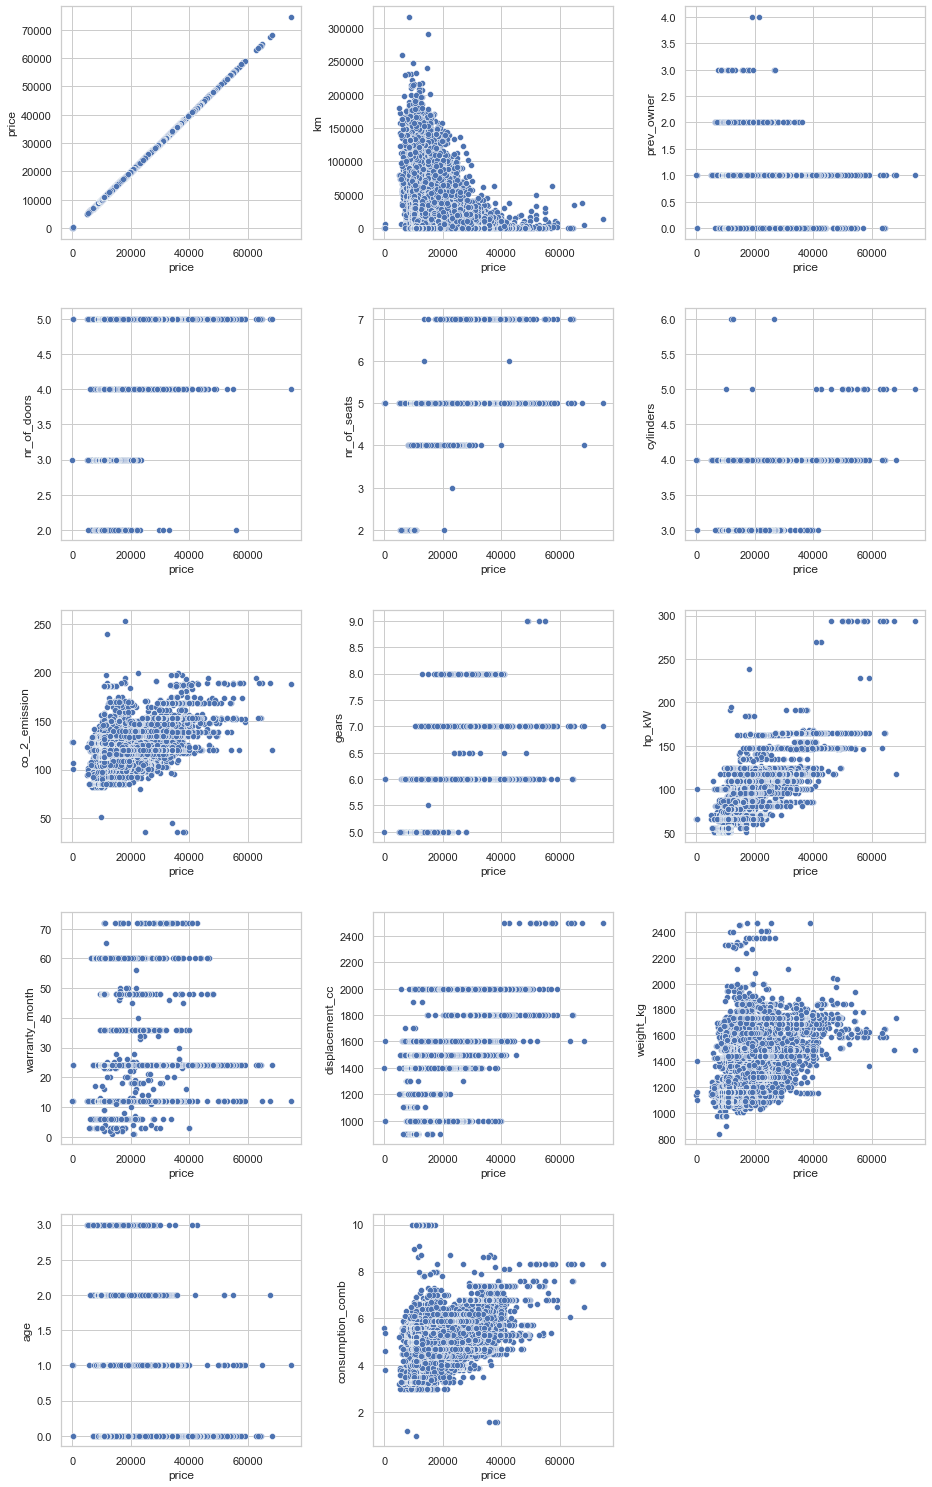

In [82]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(5,3,i+1)
        sns.scatterplot(x='price', y=col, data=df_numeric)

## Scatter plot with kws to check the correlation

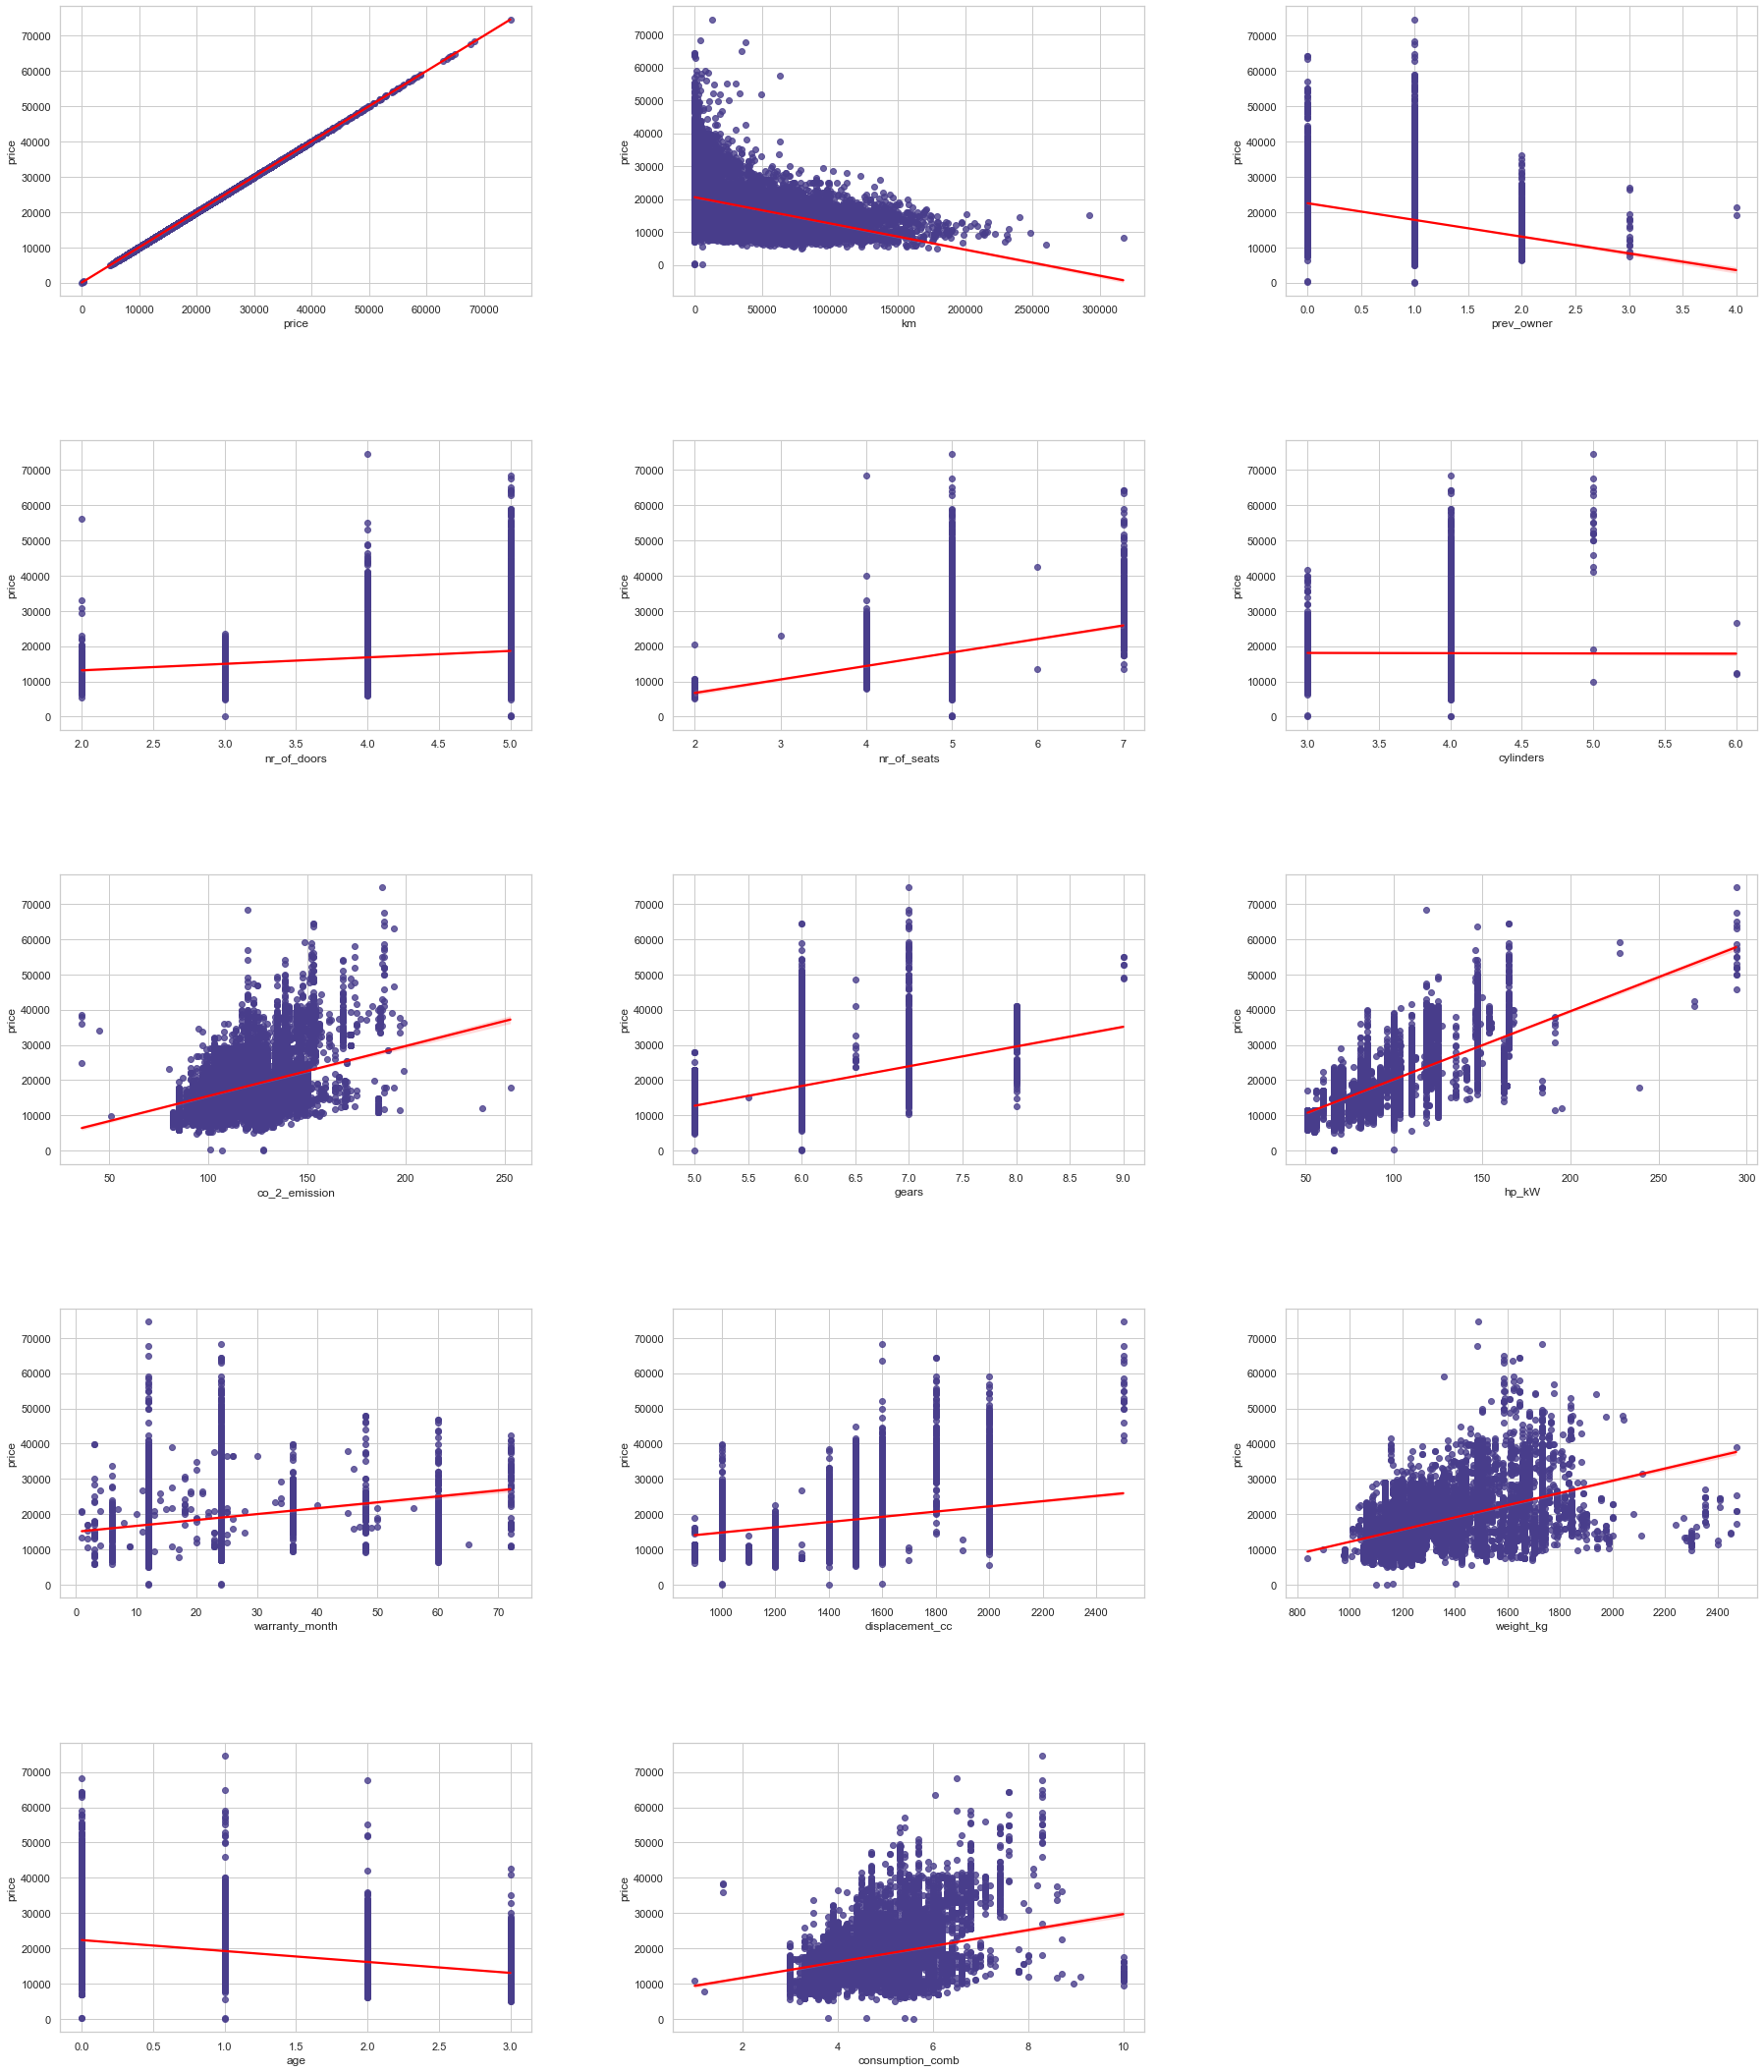

In [83]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "price", data=df_numeric, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

## Correlation

In [84]:
corr_matrix = df_numeric.corr(method = 'pearson')
corr_matrix

price        km  prev_owner  nr_of_doors  nr_of_seats  \
price             1.000000 -0.399926   -0.253330     0.158966     0.247084   
km               -0.399926  1.000000    0.258905     0.004795    -0.009055   
prev_owner       -0.253330  0.258905    1.000000    -0.158211    -0.013412   
nr_of_doors       0.158966  0.004795   -0.158211     1.000000     0.100757   
nr_of_seats       0.247084 -0.009055   -0.013412     0.100757     1.000000   
cylinders        -0.004085  0.237314    0.105435     0.049785     0.221621   
co_2_emission     0.346584 -0.230517   -0.091425    -0.046740     0.279784   
gears             0.535972 -0.034823   -0.051939     0.113674     0.096122   
hp_kW             0.697027  0.001984   -0.069773     0.121194     0.288320   
warranty_month    0.232511 -0.317298   -0.204822     0.064871     0.019962   
displacement_cc   0.285111  0.304668    0.079221     0.094917     0.183274   
weight_kg         0.468362  0.146460    0.005002     0.174508     0.328350   
age              -0.470001  0.758015    0.437833    -0.085919    -0.084483   
consumption_comb  0.283062 -0.332758   -0.116953    -0.074934     0.221304   

                  cylinders  co_2_emission     gears     hp_kW  \
price             -0.004085       0.346584  0.535972  0.697027   
km                 0.237314      -0.230517 -0.034823  0.001984   
prev_owner         0.105435      -0.091425 -0.051939 -0.069773   
nr_of_doors        0.049785      -0.046740  0.113674  0.121194   
nr_of_seats        0.221621       0.279784  0.096122  0.288320   
cylinders          1.000000       0.314199  0.116759  0.314379   
co_2_emission      0.314199       1.000000  0.108677  0.521737   
gears              0.116759       0.108677  1.000000  0.452757   
hp_kW              0.314379       0.521737  0.452757  1.000000   
warranty_month    -0.167880       0.115892  0.022317  0.007449   
displacement_cc    0.710533       0.278241  0.348340  0.602883   
weight_kg          0.318322       0.297828  0.335342  0.637248   
age                0.197862      -0.290167 -0.065644 -0.082603   
consumption_comb   0.164444       0.881180  0.023941  0.385832   

                  warranty_month  displacement_cc  weight_kg       age  \
price                   0.232511         0.285111   0.468362 -0.470001   
km                     -0.317298         0.304668   0.146460  0.758015   
prev_owner             -0.204822         0.079221   0.005002  0.437833   
nr_of_doors             0.064871         0.094917   0.174508 -0.085919   
nr_of_seats             0.019962         0.183274   0.328350 -0.084483   
cylinders              -0.167880         0.710533   0.318322  0.197862   
co_2_emission           0.115892         0.278241   0.297828 -0.290167   
gears                   0.022317         0.348340   0.335342 -0.065644   
hp_kW                   0.007449         0.602883   0.637248 -0.082603   
warranty_month          1.000000        -0.144440  -0.035296 -0.427205   
displacement_cc        -0.144440         1.000000   0.562392  0.213370   
weight_kg              -0.035296         0.562392   1.000000  0.067231   
age                    -0.427205         0.213370   0.067231  1.000000   
consumption_comb        0.150568         0.022878   0.084621 -0.367047   

                  consumption_comb  
price                     0.283062  
km                       -0.332758  
prev_owner               -0.116953  
nr_of_doors              -0.074934  
nr_of_seats               0.221304  
cylinders                 0.164444  
co_2_emission             0.881180  
gears                     0.023941  
hp_kW                     0.385832  
warranty_month            0.150568  
displacement_cc           0.022878  
weight_kg                 0.084621  
age                      -0.367047  
consumption_comb          1.000000

## Heatmap

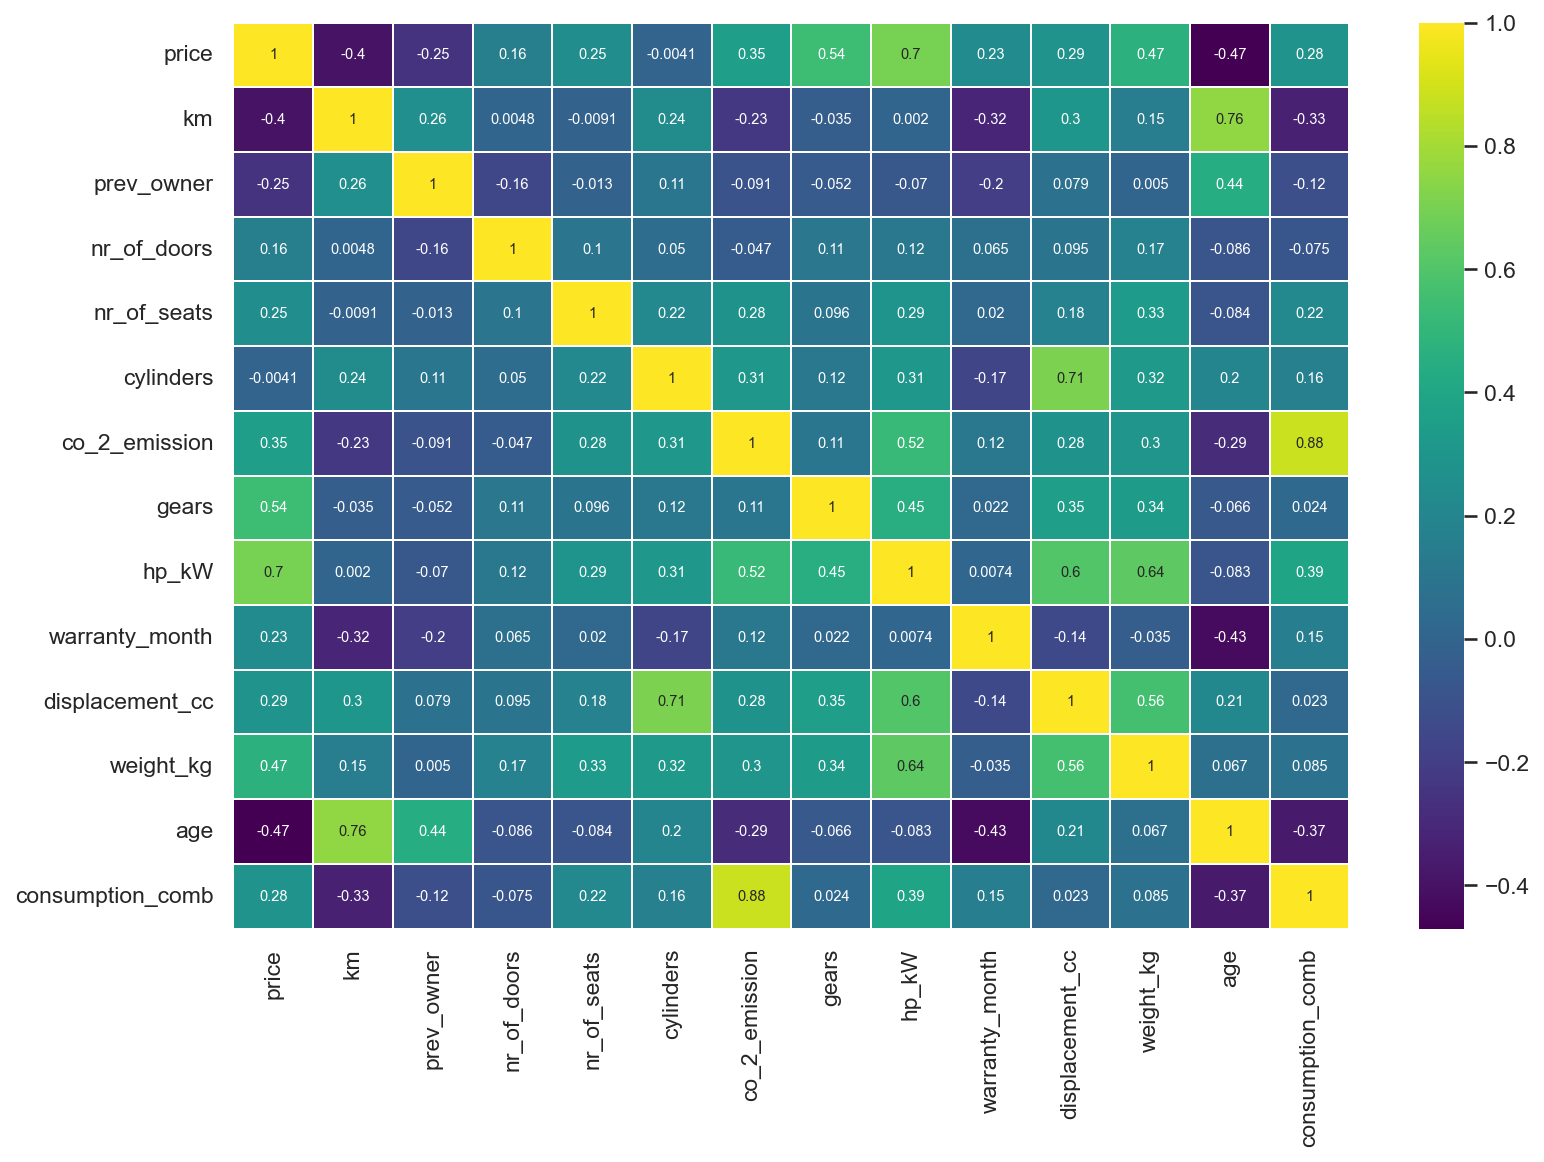

In [85]:
plt.figure(figsize=(12,8), dpi=150)
sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis', linewidths=0.2, annot_kws={'size':7});

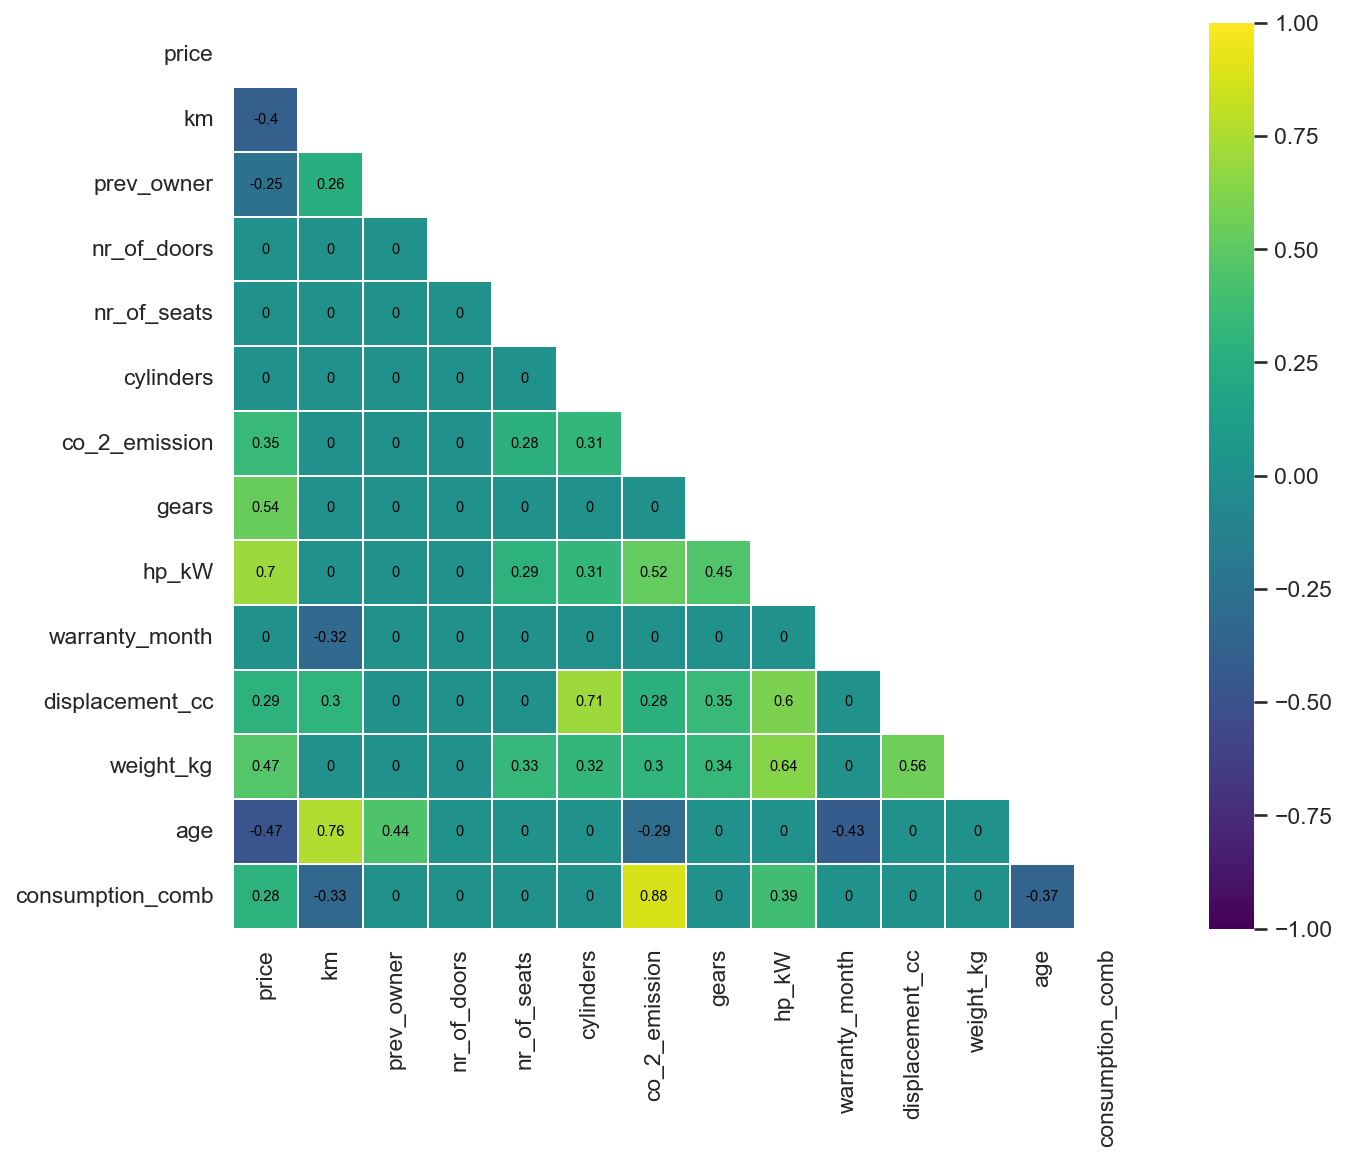

In [86]:
# Heatmap for all the numerical data including the target 'price'
plt.figure(figsize=(12,8), dpi=150)
# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df_numeric.corr(method = 'pearson')

# Replace correlation < |0.25| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.25) & (corr_matrix > -0.25)] = 0

# Mask the upper part of the heatmap
upper_tri = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix, mask=upper_tri, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 7, "color": "black"}, square=True, cmap=cmap, annot=True);

In [87]:
#Drop the columns if the correlation is less than 0.25

col= 'nr_of_doors,cylinders,warranty_month'.split(',')
col
df_numeric.drop(columns=col,inplace=True)

In [88]:
df.drop(columns=col, inplace=True)

# Handling with Categoric Columns Outlier

In [89]:
df_categoric = df.select_dtypes(include=['object'])
df_categoric

make_model body_type               vat            type body_color  \
0             Audi A1    Sedans    VAT deductible            Used      Black   
1             Audi A1    Sedans  Price negotiable            Used        Red   
2             Audi A1    Sedans    VAT deductible            Used      Black   
3             Audi A1    Sedans           Unknown            Used      Brown   
4             Audi A1    Sedans           Unknown            Used      Black   
...               ...       ...               ...             ...        ...   
15914  Renault Espace       Van    VAT deductible             New       Grey   
15915  Renault Espace       Van    VAT deductible            Used       Grey   
15916  Renault Espace       Van    VAT deductible  Pre-registered      White   
15917  Renault Espace       Van    VAT deductible  Pre-registered       Grey   
15918  Renault Espace       Van    VAT deductible   Demonstration       Grey   

      paint_type gearing_type drive_chain     fuel emission_class  \
0       Metallic    Automatic       front   Diesel         Euro 6   
1       Metallic    Automatic       front  Benzine         Euro 6   
2       Metallic    Automatic       front   Diesel         Euro 6   
3       Metallic    Automatic       front   Diesel         Euro 6   
4       Metallic    Automatic       front   Diesel         Euro 6   
...          ...          ...         ...      ...            ...   
15914   Metallic    Automatic       front   Diesel         Euro 6   
15915   Metallic    Automatic       front  Benzine         Euro 6   
15916   Metallic    Automatic       front   Diesel   Euro 6d-TEMP   
15917   Metallic    Automatic       front   Diesel         Euro 6   
15918   Metallic    Automatic         4WD  Benzine         Euro 6   

                                     comfort_convenience  \
0      Air conditioning,Armrest,Automatic climate con...   
1      Air conditioning,Automatic climate control,Hil...   
2      Air conditioning,Cruise control,Electrical sid...   
3      Air suspension,Armrest,Auxiliary heating,Elect...   
4      Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
15914  Air conditioning,Automatic climate control,Cru...   
15915  Air conditioning,Automatic climate control,Cru...   
15916  Air conditioning,Armrest,Automatic climate con...   
15917  Air conditioning,Automatic climate control,Cru...   
15918  Air conditioning,Automatic climate control,Cru...   

                                     entertainment_media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15914  Bluetooth,Digital radio,Hands-free equipment,O...   
15915  Bluetooth,Digital radio,Hands-free equipment,R...   
15916  Bluetooth,Hands-free equipment,On-board comput...   
15917                  Bluetooth,Digital radio,Radio,USB   
15918                                                USB   

                                                  extras  \
0         Alloy wheels,Catalytic Converter,Voice Control   
1      Alloy wheels,Sport seats,Sport suspension,Voic...   
2                             Alloy wheels,Voice Control   
3                 Alloy wheels,Sport seats,Voice Control   
4      Alloy wheels,Sport package,Sport suspension,Vo...   
...                                                  ...   
15914                          Alloy wheels,Touch screen   
15915            Alloy wheels,Touch screen,Voice Control   
15916                                       Alloy wheels   
15917                          Alloy wheels,Touch screen   
15918                          Alloy wheels,Touch screen   

                                         safety_security i

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15919 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  15919 non-null  object 
 4   km                   15919 non-null  float64
 5   prev_owner           15919 non-null  float64
 6   type                 15919 non-null  object 
 7   body_color           15919 non-null  object 
 8   paint_type           15919 non-null  object 
 9   nr_of_seats          15919 non-null  float64
 10  gearing_type         15919 non-null  object 
 11  drive_chain          15919 non-null  object 
 12  fuel                 15919 non-null  object 
 13  co_2_emission        15919 non-null  float64
 14  emission_class       15919 non-null  object 
 15  comfort_convenience  15919 non-null 

In [91]:
df_categoric.nunique()

make_model                9
body_type                 9
vat                       3
type                      5
body_color               14
paint_type                3
gearing_type              3
drive_chain               3
fuel                      4
emission_class            6
comfort_convenience    6198
entertainment_media     346
extras                  659
safety_security        4443
insp_new                  2
upholstery_type           5
upholstery_color          9
dtype: int64

In [92]:
# taking columns having less then 15 nunique and appending price column for further analysis

categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
categorical_features.append("price")
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make_model        15919 non-null  object
 1   body_type         15919 non-null  object
 2   vat               15919 non-null  object
 3   type              15919 non-null  object
 4   body_color        15919 non-null  object
 5   paint_type        15919 non-null  object
 6   gearing_type      15919 non-null  object
 7   drive_chain       15919 non-null  object
 8   fuel              15919 non-null  object
 9   emission_class    15919 non-null  object
 10  insp_new          15919 non-null  object
 11  upholstery_type   15919 non-null  object
 12  upholstery_color  11048 non-null  object
 13  price             15919 non-null  int64 
dtypes: int64(1), object(13)
memory usage: 1.7+ MB


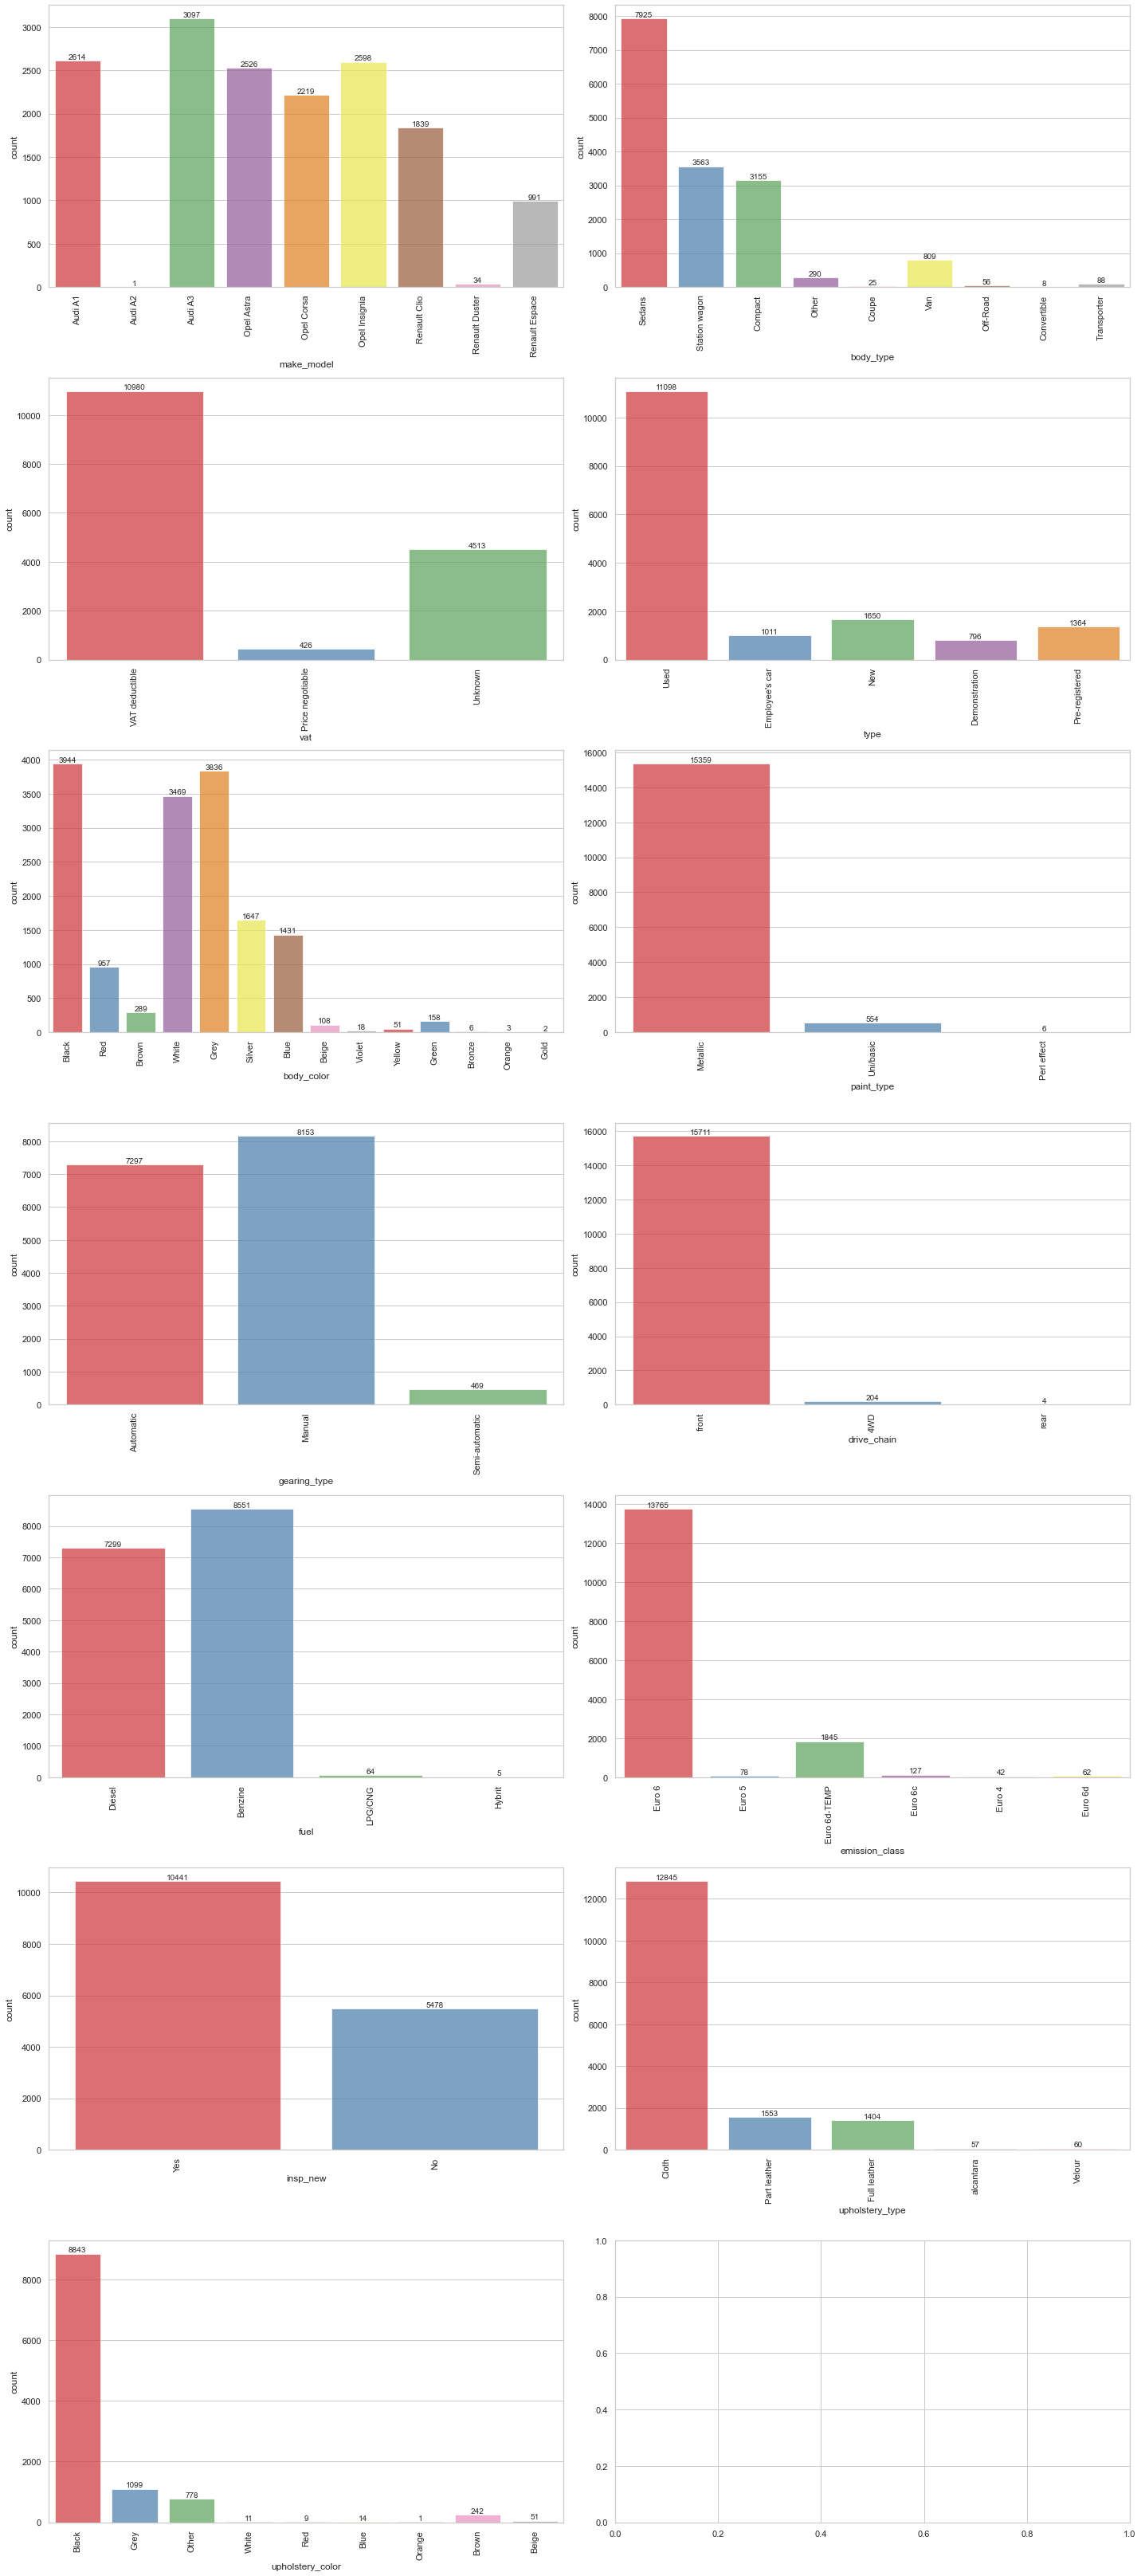

In [93]:
fig, axes = plt.subplots(round(len(df_categoric.columns) / 2), 2, figsize=(20, 45))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        g = sns.countplot(x=df_categoric.columns[i], alpha=0.7, data=df_categoric, ax=ax, palette = "Set1")
        g.bar_label(g.containers[0])
fig.tight_layout()

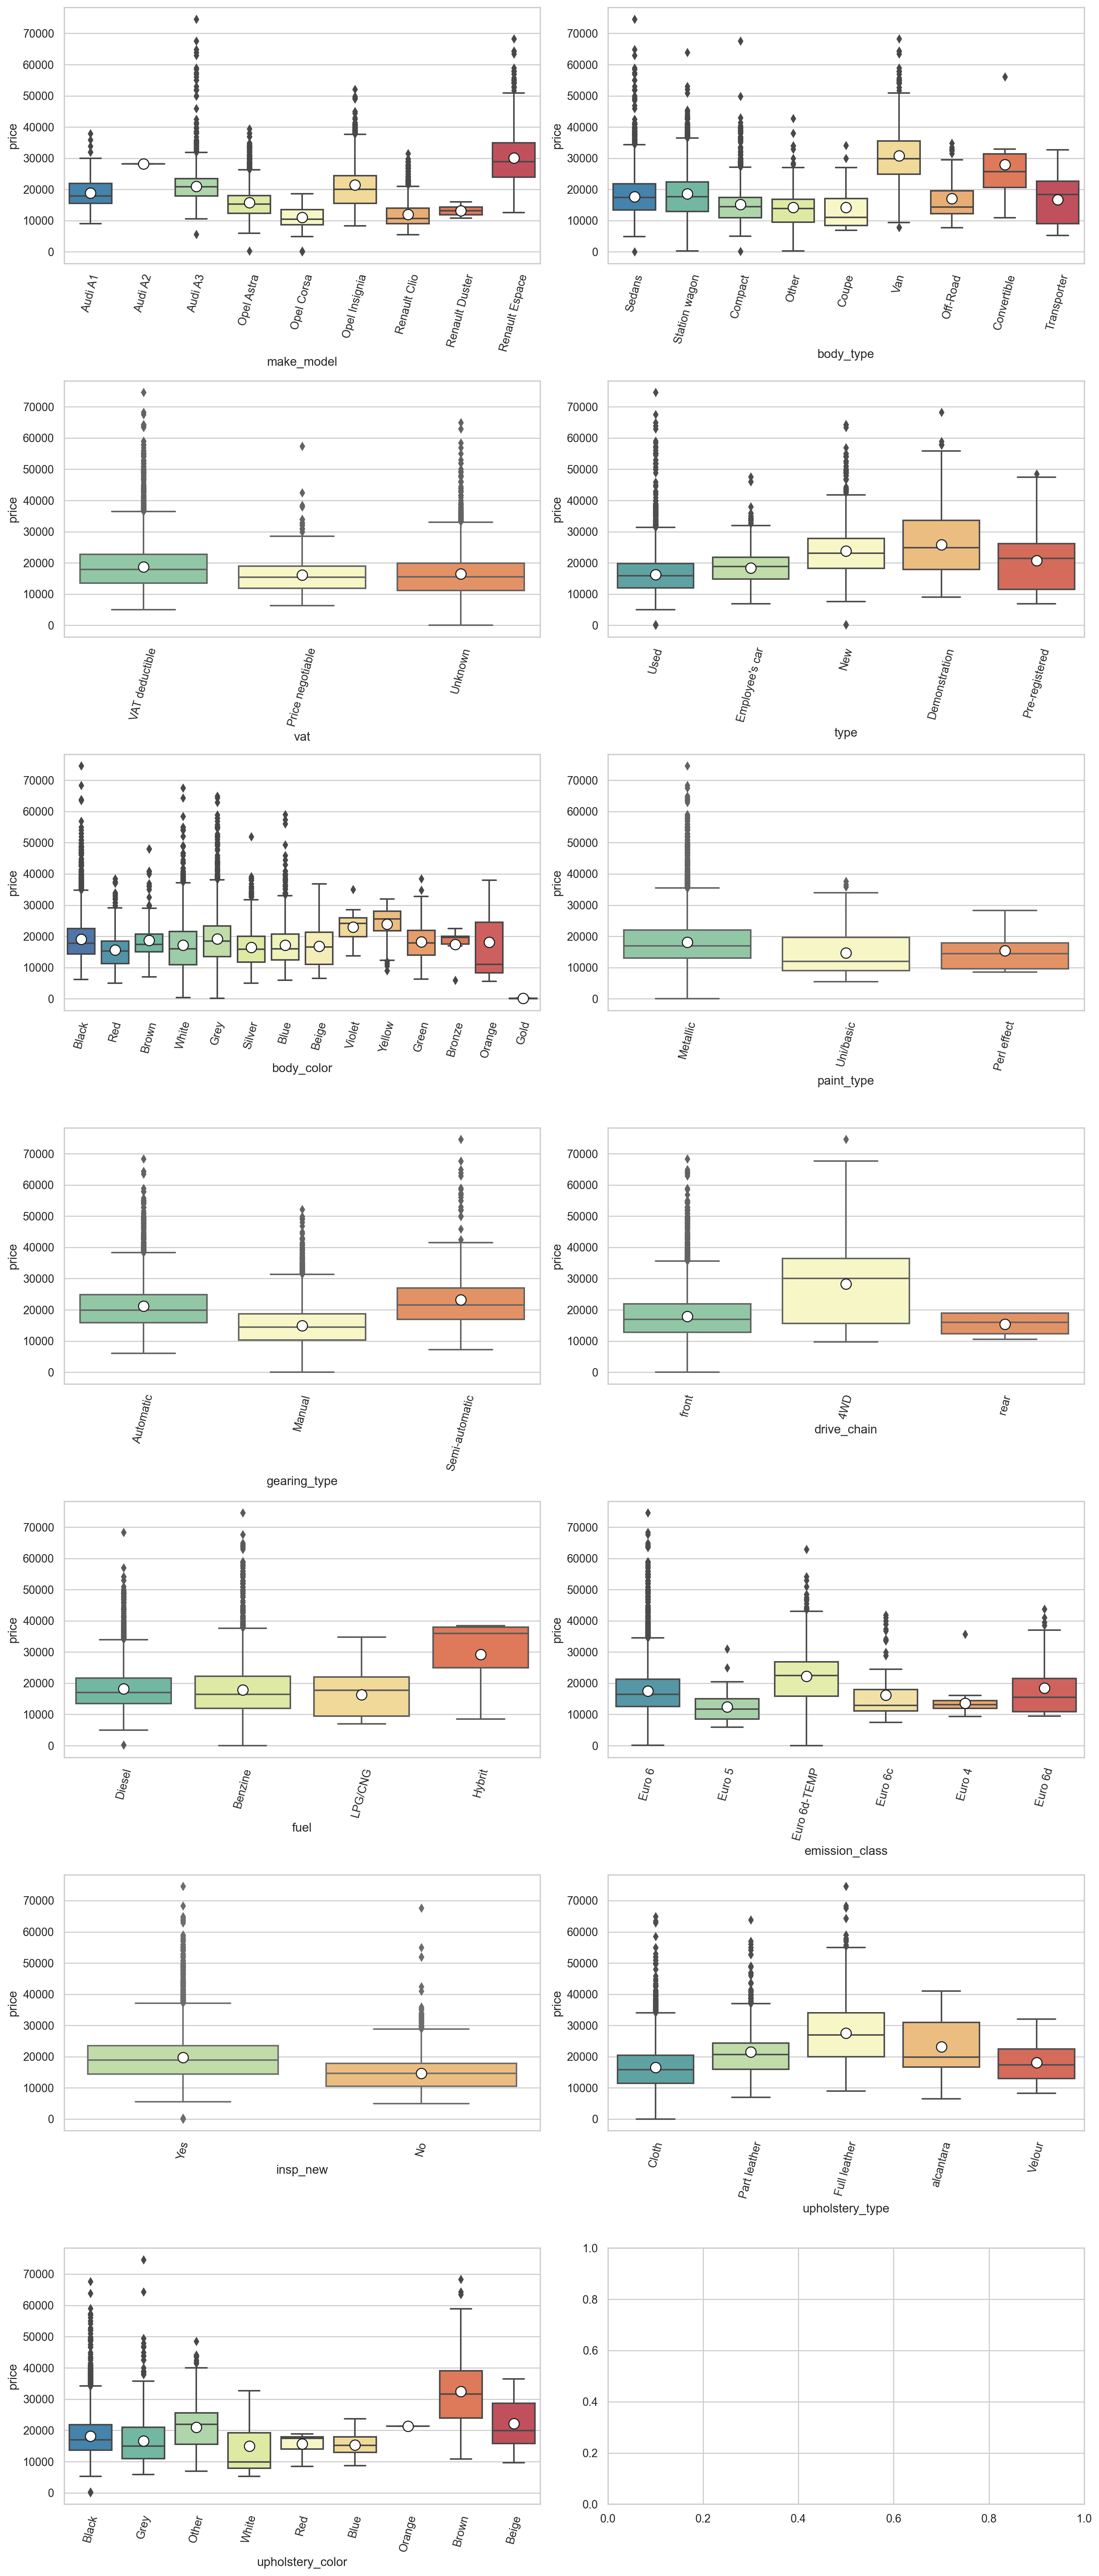

In [94]:
fig, axes = plt.subplots(
    round(len(df_categoric.columns)/2), 2, figsize=(15, 35), dpi=200)

for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categoric.columns[i], y="price", data=df_categoric, ax=ax, palette="Spectral_r")

fig.tight_layout()

In [95]:
#When comparing all the features, these features have less affected to the price so drop them
cols_to_drop=['body_color', 'emission_class','upholstery_color', 'vat', 'insp_new']

df_categoric.drop(columns=cols_to_drop, inplace=True)

In [96]:
df_categoric.columns

Index(['make_model', 'body_type', 'type', 'paint_type', 'gearing_type',
       'drive_chain', 'fuel', 'upholstery_type', 'price'],
      dtype='object')

In [97]:
df.drop(columns= cols_to_drop, inplace=True)

# Target feature price

In [98]:
iqr_lower_upper("price")

lower limit : -725.0,
upper limit : 35475.0, 
number of extreme values : 0


(-725.0, 35475.0)

In [99]:
df.price.describe().T

count   15,919.00
mean    18,019.90
std      7,386.17
min         13.00
25%     12,850.00
50%     16,900.00
75%     21,900.00
max     74,600.00
Name: price, dtype: float64

In [100]:
df.price.sort_values().head(15)

8594       13
8828      120
6066      255
8829      331
8827     4950
8825     4990
8826     5250
8824     5300
13770    5445
8823     5450
8822     5490
8820     5499
3235     5555
8821     5600
13763    5700
Name: price, dtype: int64

In [101]:
df.price.value_counts().sort_index(ascending=False)

74600    1
68320    1
67600    1
64900    1
64332    1
        ..
4950     1
331      1
255      1
120      1
13       1
Name: price, Length: 2956, dtype: int64

In [102]:
#the first 4 values after sorting shows these values are outlier
df[df.price < 4000]

make_model      body_type  price       km  prev_owner  type paint_type  \
6066  Opel Astra  Station wagon    255 5,563.00        1.00  Used   Metallic   
8594  Opel Corsa         Sedans     13   123.00        1.00  Used   Metallic   
8828  Opel Corsa        Compact    120    12.00        0.00   New   Metallic   
8829  Opel Corsa          Other    331    10.00        0.00   New   Metallic   

      nr_of_seats gearing_type drive_chain     fuel  co_2_emission  \
6066         5.00       Manual       front   Diesel         101.00   
8594         5.00       Manual       front  Benzine         128.00   
8828         5.00       Manual       front  Benzine         107.00   
8829         5.00       Manual       front  Benzine         128.00   

                                    comfort_convenience  \
6066  Air conditioning,Cruise control,Electrical sid...   
8594  Air conditioning,Cruise control,Electrical sid...   
8828  Air conditioning,Automatic climate control,Cru...   
8829  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media  \
6066  Bluetooth,Hands-free equipment,On-board comput...   
8594  Bluetooth,CD player,Hands-free equipment,MP3,O...   
8828              Digital radio,On-board computer,Radio   
8829       Hands-free equipment,On-board computer,Radio   

                             extras  \
6066                      Roof rack   
8594                   Alloy wheels   
8828  Alloy wheels,Sport suspension   
8829     Alloy wheels,Sport package   

                                        safety_security  gears  hp_kW  \
6066  ABS,Central door lock with remote control,Dayt...   6.00 100.00   
8594  ABS,Adaptive headlights,Central door lock with...   5.00  66.00   
8828  Central door lock,Daytime running lights,Drive...   6.00  66.00   
8829  ABS,Central door lock,Driver-side airbag,Elect...   6.00  66.00   

     upholstery_type  displacement_cc  weight_kg  age  consumption_comb  
6066           Cloth         1,600.00   1,403.00 1.00              3.80  
8594           Cloth         1,400.00   1,141.00 1.00              5.60  
8828           Cloth         1,000.00   1,099.00 0.00              4.60  
8829           Cloth         1,000.00   1,163.00 0.00              5.40

In [103]:
#drop outliers in price

df.drop(index= df[df.price < 4000].index, inplace=True)

In [104]:
df.shape

(15915, 23)

# Final Step (Checking final situation of data via graphs)

In [105]:
df_numeric

price        km  prev_owner  nr_of_seats  co_2_emission  gears  hp_kW  \
0      15770 56,013.00        2.00         5.00          99.00   7.00  66.00   
1      14500 80,000.00        1.00         4.00         129.00   7.00 141.00   
2      14640 83,450.00        1.00         4.00          99.00   7.00  85.00   
3      14500 73,000.00        1.00         4.00          99.00   6.00  66.00   
4      16790 16,200.00        1.00         5.00         109.00   7.00  66.00   
...      ...       ...         ...          ...            ...    ...    ...   
15914  39950     16.99        0.00         5.00         139.00   6.00 147.00   
15915  39885  9,900.00        1.00         5.00         168.00   7.00 165.00   
15916  39875     15.00        1.00         7.00         139.00   6.00 146.00   
15917  39700     10.00        1.00         7.00         139.00   6.00 147.00   
15918  40999  3,373.87        1.00         5.00         153.00   6.00 165.00   

       displacement_cc  weight_kg  age  consumption_comb  
0             1,400.00   1,220.00 3.00              3.80  
1             1,800.00   1,255.00 2.00              5.60  
2             1,600.00   1,135.00 3.00              3.80  
3             1,400.00   1,195.00 3.00              3.80  
4             1,400.00   1,135.00 3.00              4.10  
...                ...        ...  ...               ...  
15914         2,000.00   1,758.00 0.00              5.30  
15915         1,800.00   1,708.00 0.00              7.40  
15916         2,000.00   1,734.00 0.00              5.30  
15917         2,000.00   1,758.00 0.00              5.30  
15918         1,800.00   1,685.00 0.00              6.80  

[15919 rows x 11 columns]

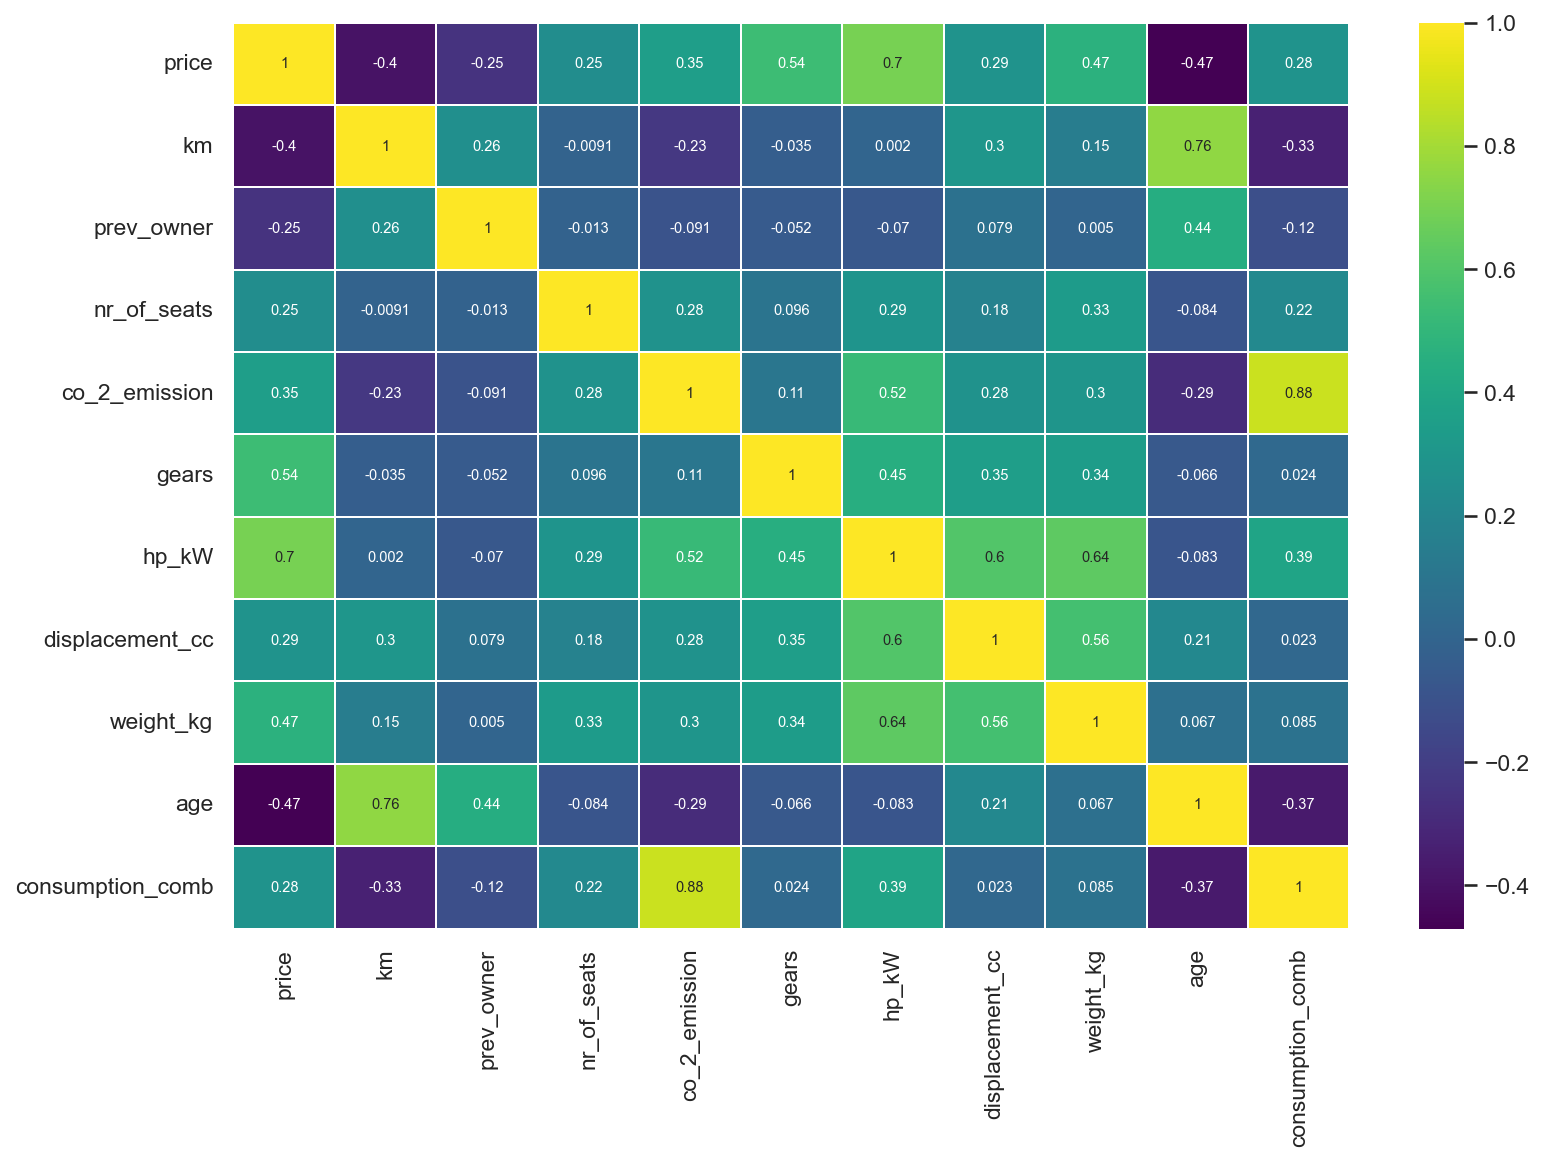

In [106]:
plt.figure(figsize=(12,8), dpi=150)
sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis', linewidths=0.2, annot_kws={'size':7});

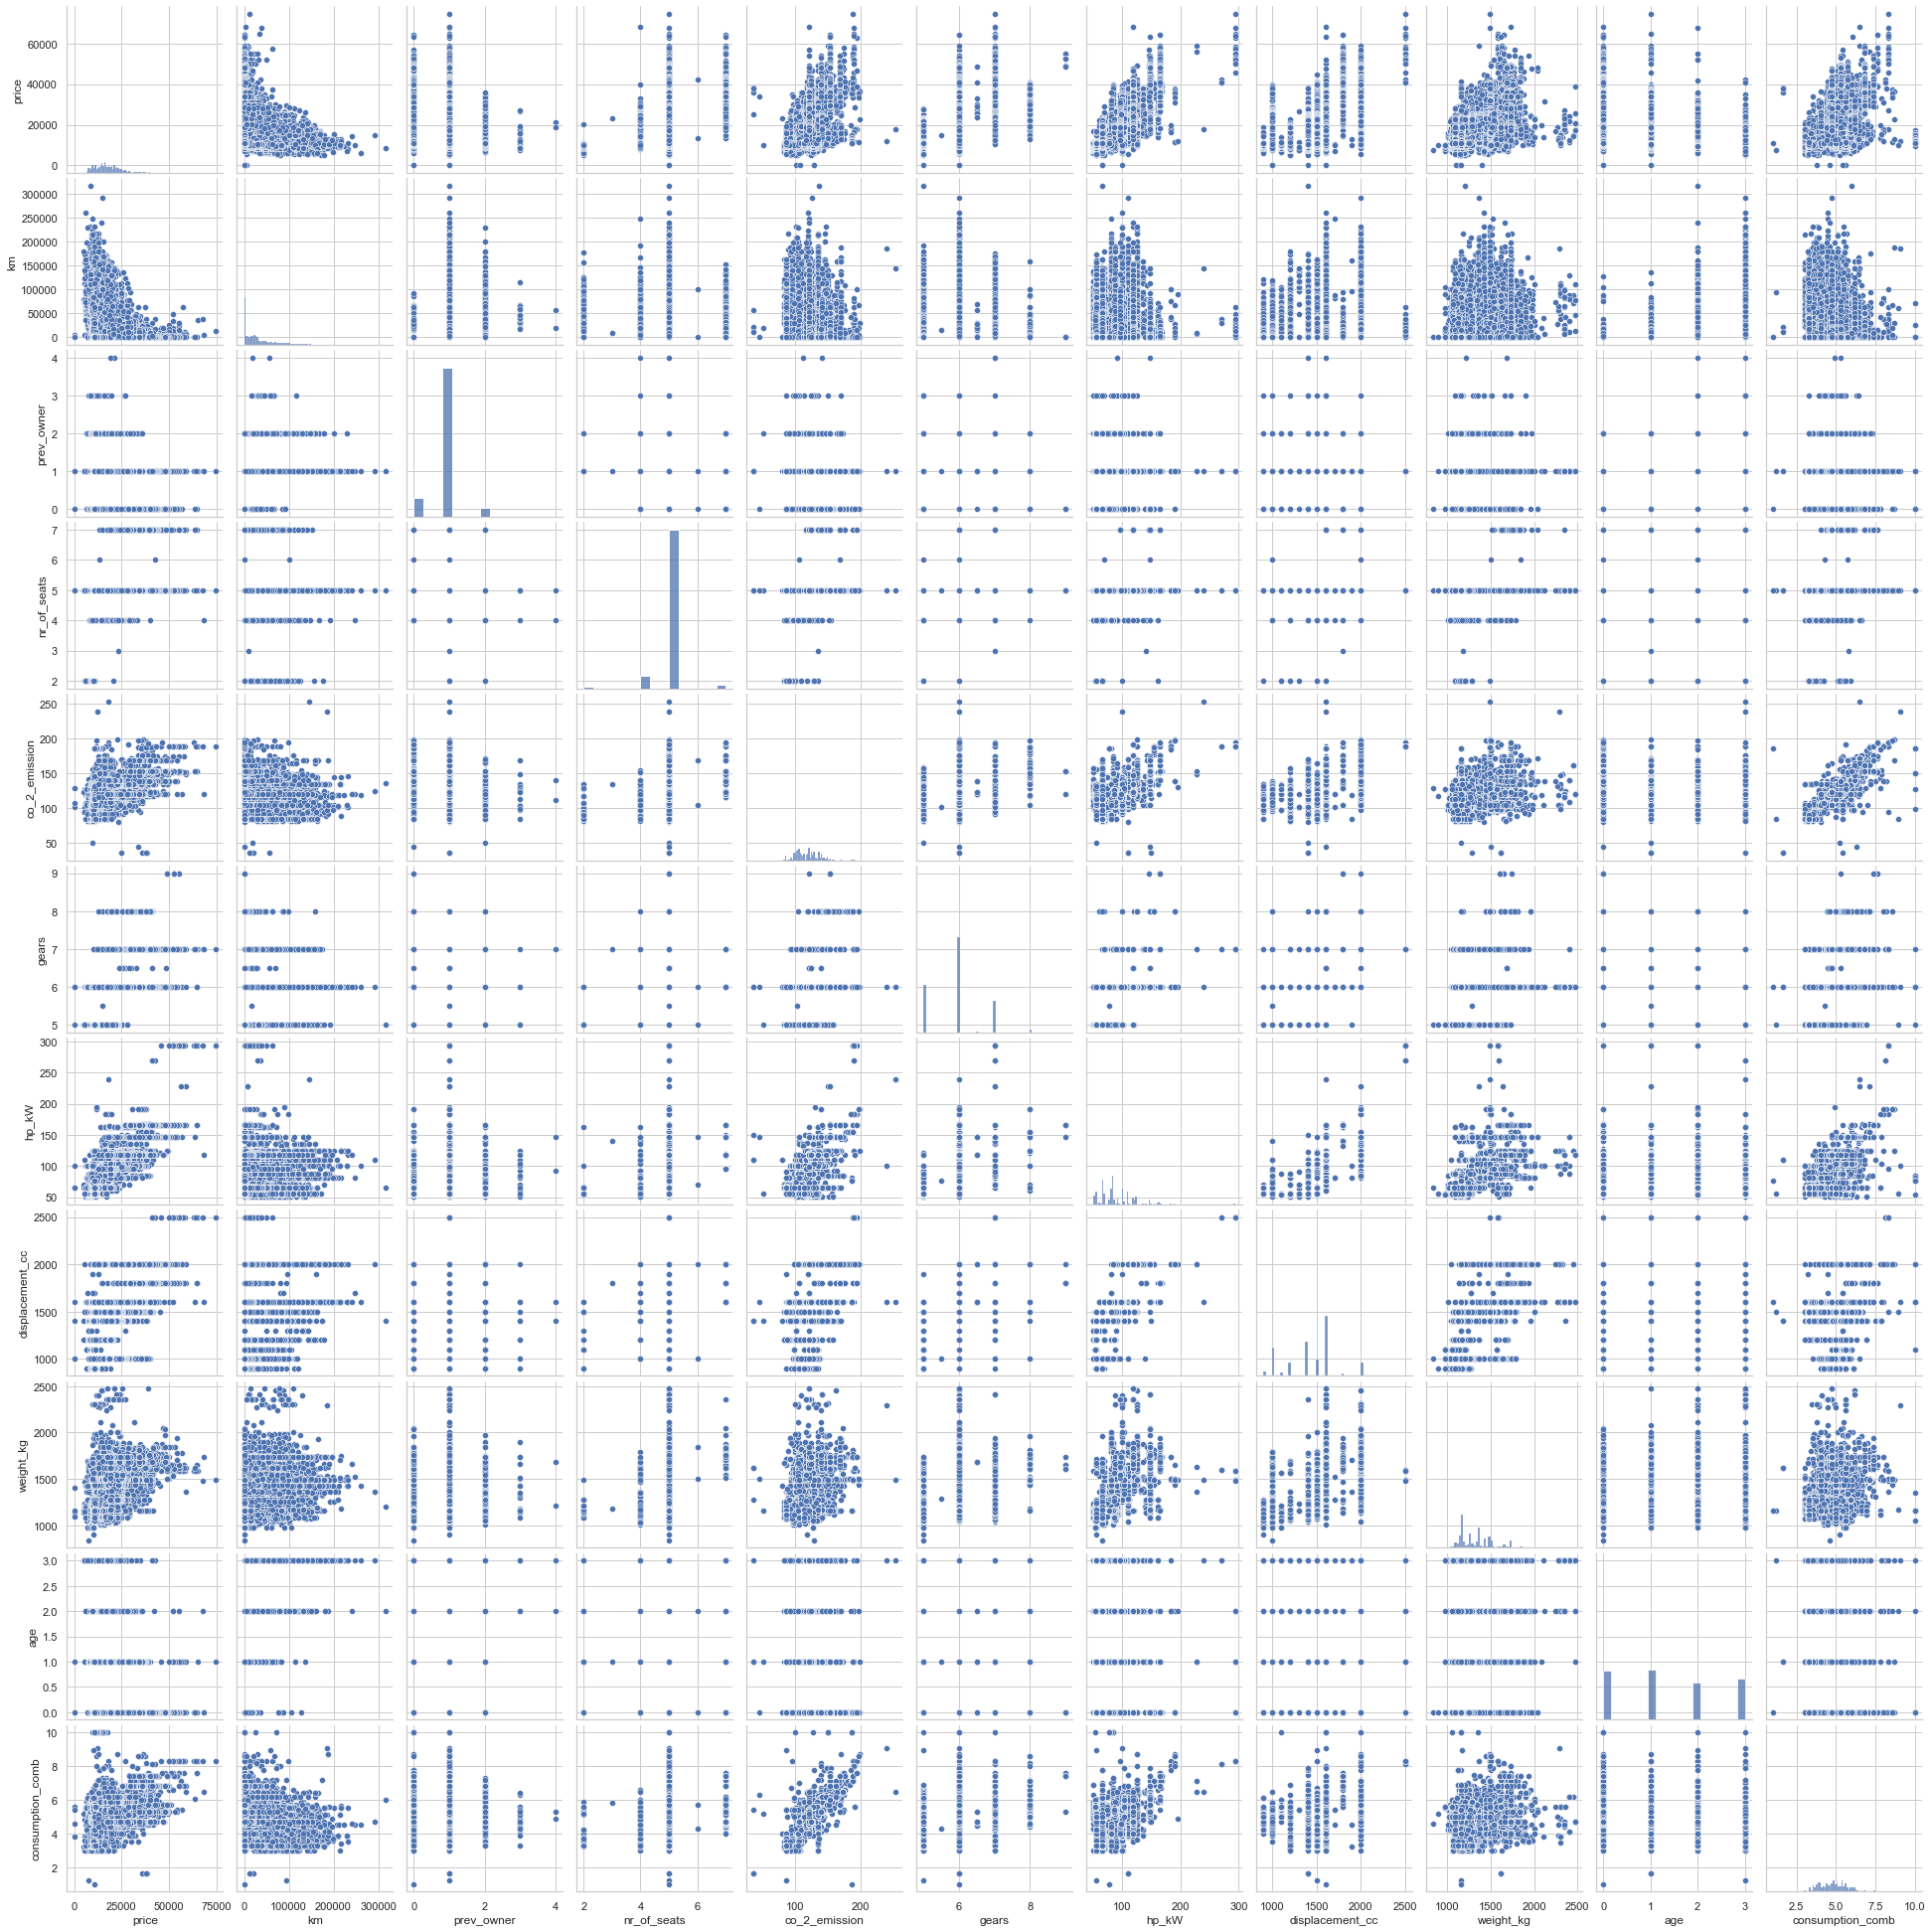

In [107]:
sns.pairplot(df_numeric);

In [108]:
df_categoric

make_model body_type            type paint_type gearing_type  \
0             Audi A1    Sedans            Used   Metallic    Automatic   
1             Audi A1    Sedans            Used   Metallic    Automatic   
2             Audi A1    Sedans            Used   Metallic    Automatic   
3             Audi A1    Sedans            Used   Metallic    Automatic   
4             Audi A1    Sedans            Used   Metallic    Automatic   
...               ...       ...             ...        ...          ...   
15914  Renault Espace       Van             New   Metallic    Automatic   
15915  Renault Espace       Van            Used   Metallic    Automatic   
15916  Renault Espace       Van  Pre-registered   Metallic    Automatic   
15917  Renault Espace       Van  Pre-registered   Metallic    Automatic   
15918  Renault Espace       Van   Demonstration   Metallic    Automatic   

      drive_chain     fuel upholstery_type  price  
0           front   Diesel           Cloth  15770  
1           front  Benzine           Cloth  14500  
2           front   Diesel           Cloth  14640  
3           front   Diesel           Cloth  14500  
4           front   Diesel           Cloth  16790  
...           ...      ...             ...    ...  
15914       front   Diesel    Full leather  39950  
15915       front  Benzine           Cloth  39885  
15916       front   Diesel    Full leather  39875  
15917       front   Diesel    Part leather  39700  
15918         4WD  Benzine    Full leather  40999  

[15919 rows x 9 columns]

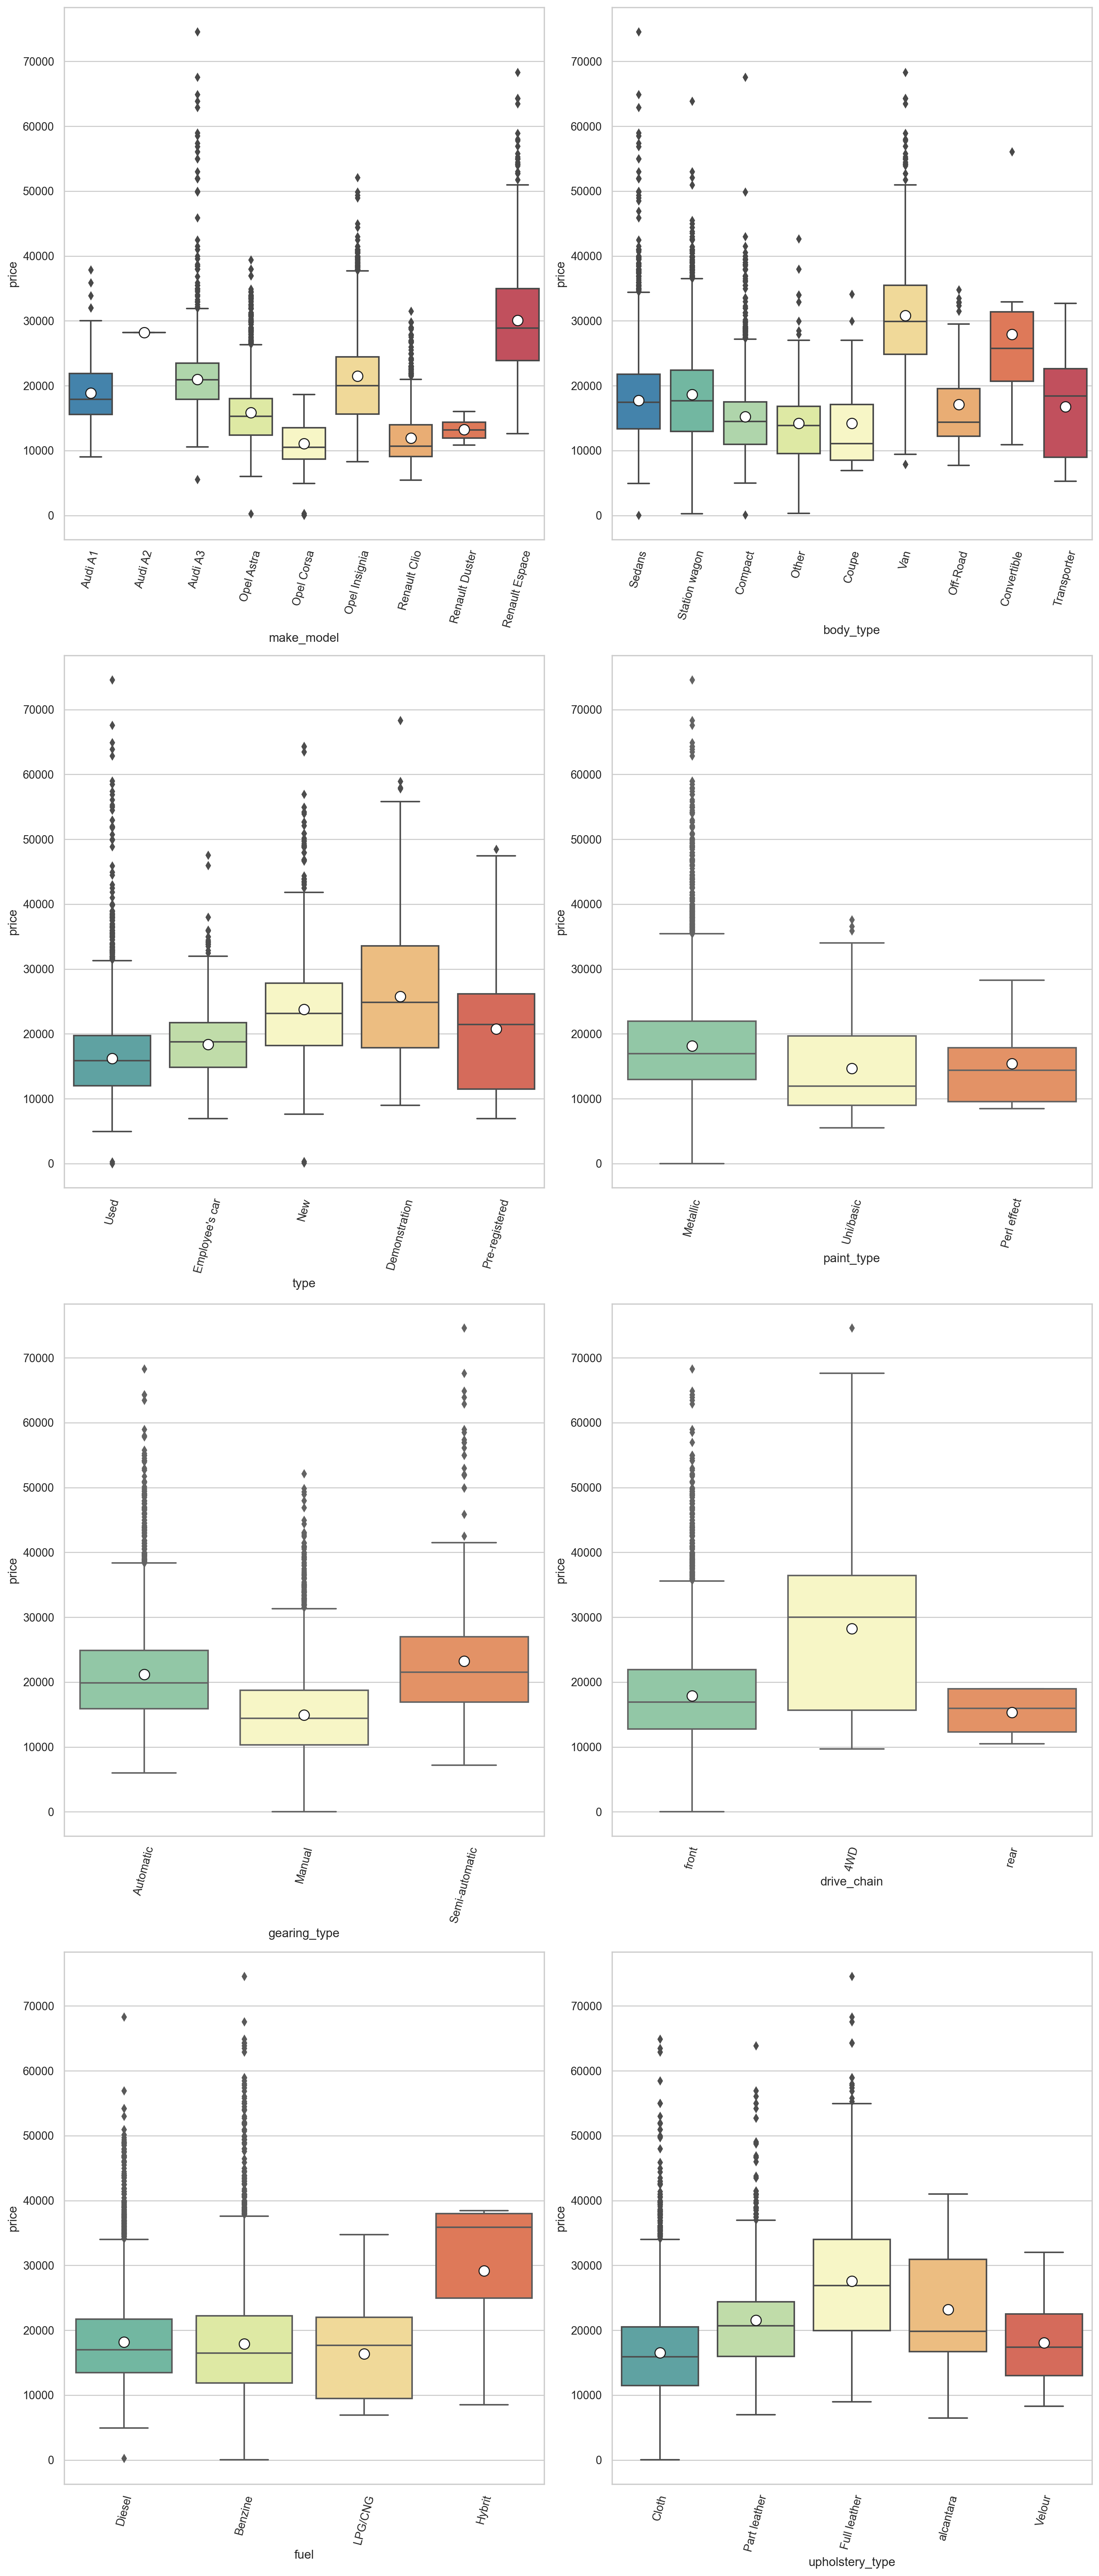

In [109]:
fig, axes = plt.subplots(
    round(len(df_categoric.columns)/2), 2, figsize=(15, 35), dpi=200)

for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categoric.columns[i], y="price", data=df_categoric, ax=ax, palette="Spectral_r")

fig.tight_layout()

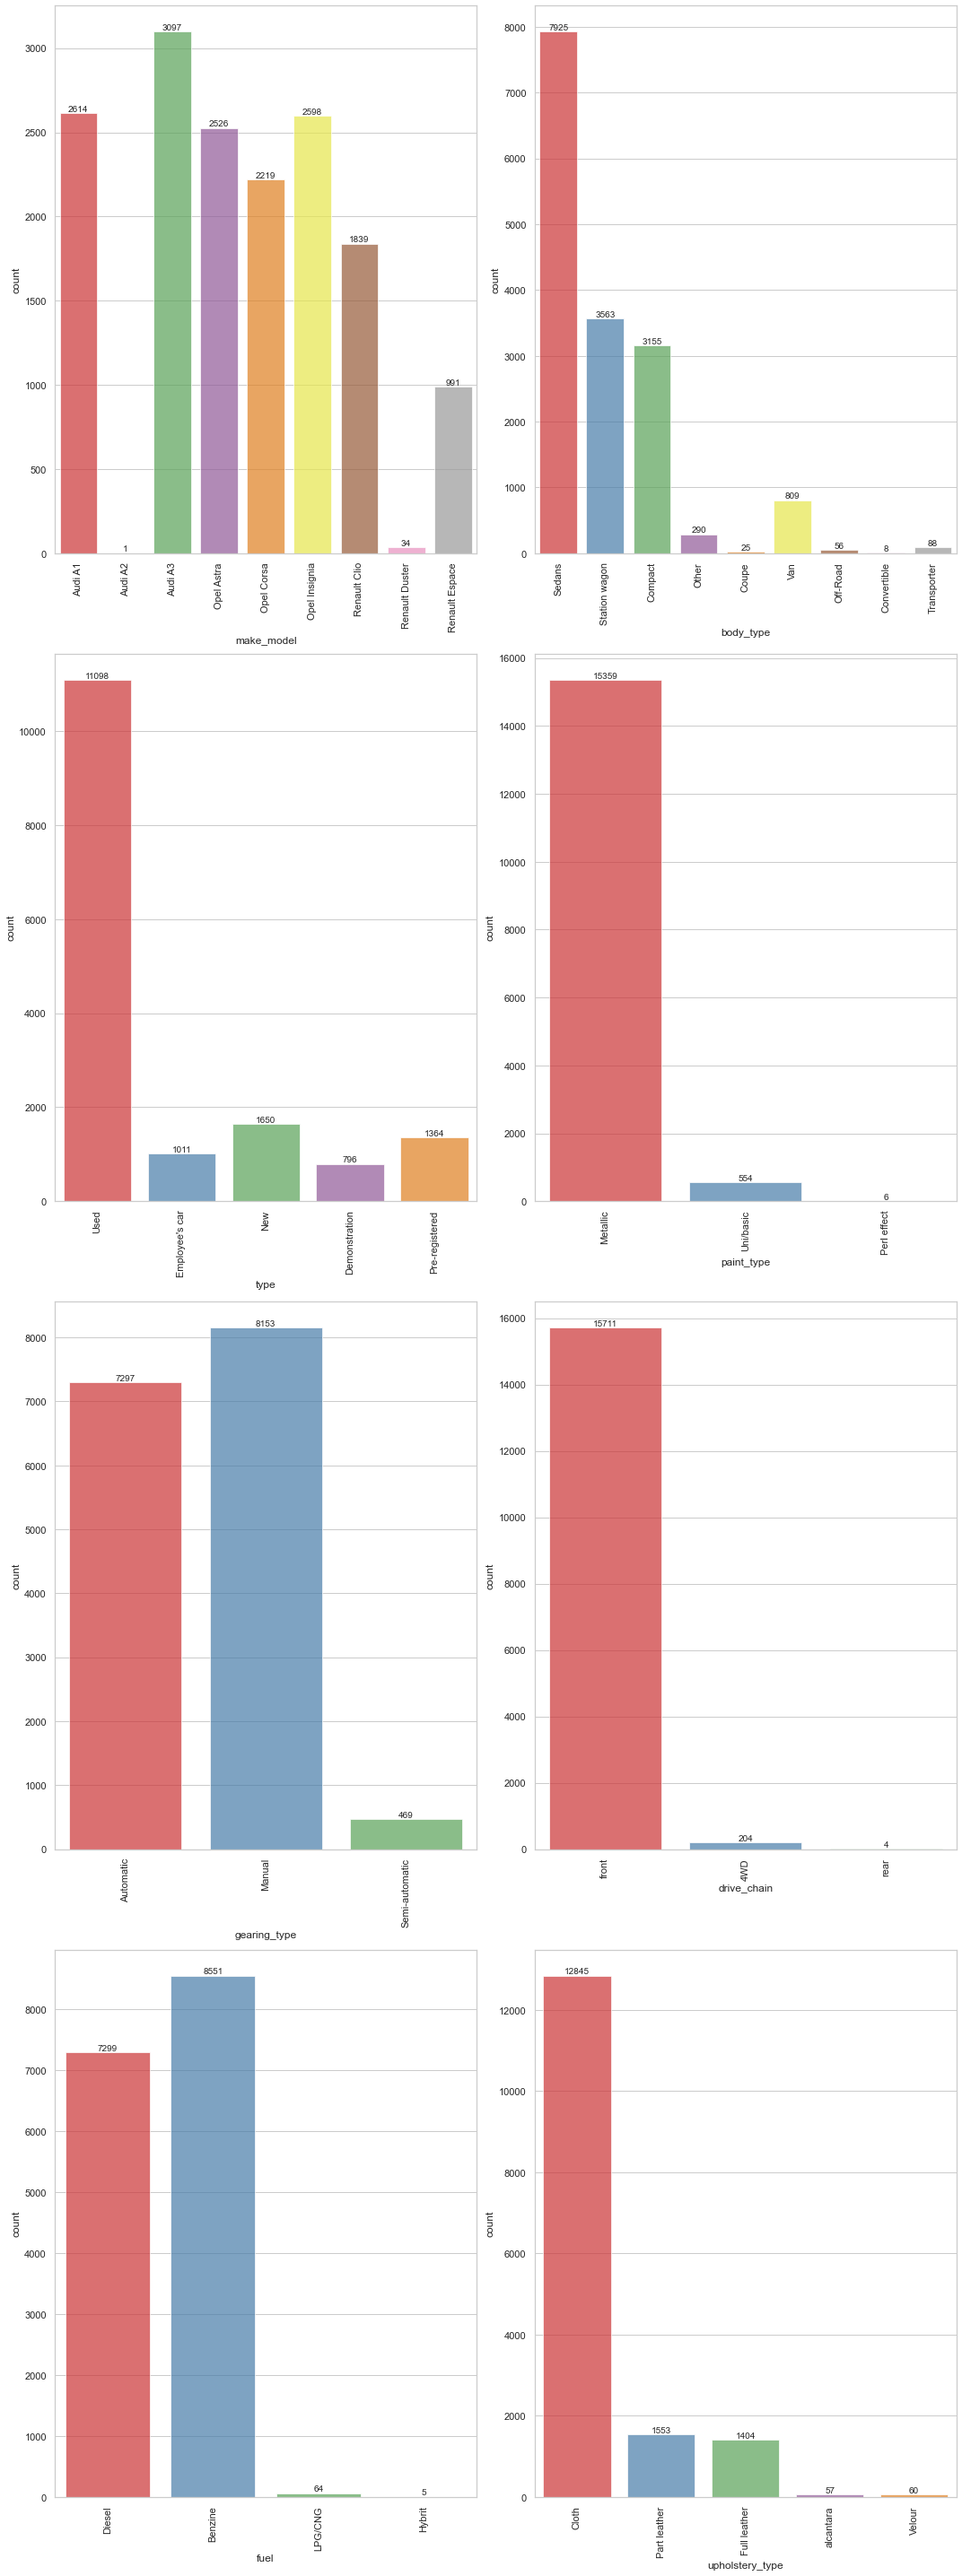

In [110]:
fig, axes = plt.subplots(round(len(df_categoric.columns) / 2), 2, figsize=(15, 40))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        g = sns.countplot(x=df_categoric.columns[i], alpha=0.7, data=df_categoric, ax=ax, palette = "Set1")
        g.bar_label(g.containers[0])
fig.tight_layout()

In [111]:
df.to_csv('final_scout_not_get_dummy.csv', index = False)

# Dummy Operation

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   km                   15915 non-null  float64
 4   prev_owner           15915 non-null  float64
 5   type                 15915 non-null  object 
 6   paint_type           15915 non-null  object 
 7   nr_of_seats          15915 non-null  float64
 8   gearing_type         15915 non-null  object 
 9   drive_chain          15915 non-null  object 
 10  fuel                 15915 non-null  object 
 11  co_2_emission        15915 non-null  float64
 12  comfort_convenience  15915 non-null  object 
 13  entertainment_media  15915 non-null  object 
 14  extras               15915 non-null  object 
 15  safety_security      15915 non-null 

In [113]:
df_categoric=df.select_dtypes(include="O")
categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make_model       15915 non-null  object
 1   body_type        15915 non-null  object
 2   type             15915 non-null  object
 3   paint_type       15915 non-null  object
 4   gearing_type     15915 non-null  object
 5   drive_chain      15915 non-null  object
 6   fuel             15915 non-null  object
 7   upholstery_type  15915 non-null  object
dtypes: object(8)
memory usage: 1.1+ MB


In [115]:
df_dummied = pd.get_dummies(columns= list(df_categoric.columns),data=df, drop_first=True)

In [116]:
df_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         15915 non-null  int64  
 1   km                            15915 non-null  float64
 2   prev_owner                    15915 non-null  float64
 3   nr_of_seats                   15915 non-null  float64
 4   co_2_emission                 15915 non-null  float64
 5   comfort_convenience           15915 non-null  object 
 6   entertainment_media           15915 non-null  object 
 7   extras                        15915 non-null  object 
 8   safety_security               15915 non-null  object 
 9   gears                         15915 non-null  float64
 10  hp_kW                         15915 non-null  float64
 11  displacement_cc               15915 non-null  float64
 12  weight_kg                     15915 non-null  float64
 13  a

In [117]:
df_dummied = df_dummied.join(df_dummied['comfort_convenience'].str.get_dummies(sep=',').add_prefix('CC_'))
df_dummied = df_dummied.join(df_dummied['entertainment_media'].str.get_dummies(sep=',').add_prefix('EM_'))
df_dummied = df_dummied.join(df_dummied['extras'].str.get_dummies(sep=',').add_prefix('E_'))
df_dummied = df_dummied.join(df_dummied['safety_security'].str.get_dummies(sep=',').add_prefix('SS_'))

In [118]:
df_dummied

price        km  prev_owner  nr_of_seats  co_2_emission  \
0      15770 56,013.00        2.00         5.00          99.00   
1      14500 80,000.00        1.00         4.00         129.00   
2      14640 83,450.00        1.00         4.00          99.00   
3      14500 73,000.00        1.00         4.00          99.00   
4      16790 16,200.00        1.00         5.00         109.00   
...      ...       ...         ...          ...            ...   
15914  39950     16.99        0.00         5.00         139.00   
15915  39885  9,900.00        1.00         5.00         168.00   
15916  39875     15.00        1.00         7.00         139.00   
15917  39700     10.00        1.00         7.00         139.00   
15918  40999  3,373.87        1.00         5.00         153.00   

                                     comfort_convenience  \
0      Air conditioning,Armrest,Automatic climate con...   
1      Air conditioning,Automatic climate control,Hil...   
2      Air conditioning,Cruise control,Electrical sid...   
3      Air suspension,Armrest,Auxiliary heating,Elect...   
4      Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
15914  Air conditioning,Automatic climate control,Cru...   
15915  Air conditioning,Automatic climate control,Cru...   
15916  Air conditioning,Armrest,Automatic climate con...   
15917  Air conditioning,Automatic climate control,Cru...   
15918  Air conditioning,Automatic climate control,Cru...   

                                     entertainment_media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15914  Bluetooth,Digital radio,Hands-free equipment,O...   
15915  Bluetooth,Digital radio,Hands-free equipment,R...   
15916  Bluetooth,Hands-free equipment,On-board comput...   
15917                  Bluetooth,Digital radio,Radio,USB   
15918                                                USB   

                                                  extras  \
0         Alloy wheels,Catalytic Converter,Voice Control   
1      Alloy wheels,Sport seats,Sport suspension,Voic...   
2                             Alloy wheels,Voice Control   
3                 Alloy wheels,Sport seats,Voice Control   
4      Alloy wheels,Sport package,Sport suspension,Vo...   
...                                                  ...   
15914                          Alloy wheels,Touch screen   
15915            Alloy wheels,Touch screen,Voice Control   
15916                                       Alloy wheels   
15917                          Alloy wheels,Touch screen   
15918                          Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kW  \
0      ABS,Central door lock,Daytime running lights,D...   7.00  66.00   
1      ABS,Central door lock,Central door lock with r...   7.00 141.00   
2      ABS,Central door lock,Daytime running lights,D...   7.00  85.00   
3      ABS,Alarm system,Central door lock with remote...   6.00  66.00   
4      ABS,Central door lock,Driver-side airbag,Elect...   7.00  66.00   
...                                                  ...    ...    ...   
15914  ABS,Central door lock,Central door lock with r...   6.00 147.00   
15915  ABS,Adaptive Cruise Control,Blind spot monitor...   7.00 165.00   
15916  ABS,Adaptive Cruise Control,Blind spot monitor...   6.00 146.00   
15917  ABS,Blind spot monitor,Driver-side airbag,Elec...   6.00 147.00   
15918  ABS,Blind spot monitor,Daytime running lights,...   6.00 165.00   

       displacement_cc  weight_kg  age  consumption_comb  make_model_Audi A2  \
0             1,400.00   1,220.00 3.00              3.80                   0   
1 

In [119]:
df_dummied.drop(columns=["comfort_convenience", "entertainment_media","extras","safety_security"], inplace=True)

In [120]:
df_dummied

price        km  prev_owner  nr_of_seats  co_2_emission  gears  hp_kW  \
0      15770 56,013.00        2.00         5.00          99.00   7.00  66.00   
1      14500 80,000.00        1.00         4.00         129.00   7.00 141.00   
2      14640 83,450.00        1.00         4.00          99.00   7.00  85.00   
3      14500 73,000.00        1.00         4.00          99.00   6.00  66.00   
4      16790 16,200.00        1.00         5.00         109.00   7.00  66.00   
...      ...       ...         ...          ...            ...    ...    ...   
15914  39950     16.99        0.00         5.00         139.00   6.00 147.00   
15915  39885  9,900.00        1.00         5.00         168.00   7.00 165.00   
15916  39875     15.00        1.00         7.00         139.00   6.00 146.00   
15917  39700     10.00        1.00         7.00         139.00   6.00 147.00   
15918  40999  3,373.87        1.00         5.00         153.00   6.00 165.00   

       displacement_cc  weight_kg  age  consumption_comb  make_model_Audi A2  \
0             1,400.00   1,220.00 3.00              3.80                   0   
1             1,800.00   1,255.00 2.00              5.60                   0   
2             1,600.00   1,135.00 3.00              3.80                   0   
3             1,400.00   1,195.00 3.00              3.80                   0   
4             1,400.00   1,135.00 3.00              4.10                   0   
...                ...        ...  ...               ...                 ...   
15914         2,000.00   1,758.00 0.00              5.30                   0   
15915         1,800.00   1,708.00 0.00              7.40                   0   
15916         2,000.00   1,734.00 0.00              5.30                   0   
15917         2,000.00   1,758.00 0.00              5.30                   0   
15918         1,800.00   1,685.00 0.00              6.80                   0   

       make_model_Audi A3  make_model_Opel Astra  make_model_Opel Corsa  \
0                       0                      0                      0   
1                       0                      0                      0   
2                       0                      0                      0   
3                       0                      0                      0   
4                       0                      0                      0   
...                   ...                    ...                    ...   
15914                   0                      0                      0   
15915                   0                      0                      0   
15916                   0                      0                      0   
15917                   0                      0                      0   
15918                   0                      0                      0   

       make_model_Opel Insignia  make_model_Renault Clio  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
15914                         0                        0   
15915                         0                        0   
15916                         0                        0   
15917                         0                        0   
15918                         0                        0   

       make_model_Renault Duster  make_model_Renault Espace  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
15914                 

# Export dummy dataframe to csv file

In [121]:
df_dummied.to_csv("final_scout_dummy_s.csv", index=False)

In [122]:
df_final=pd.read_csv('final_scout_dummy_s.csv')
df_final.head()

price        km  prev_owner  nr_of_seats  co_2_emission  gears  hp_kW  \
0  15770 56,013.00        2.00         5.00          99.00   7.00  66.00   
1  14500 80,000.00        1.00         4.00         129.00   7.00 141.00   
2  14640 83,450.00        1.00         4.00          99.00   7.00  85.00   
3  14500 73,000.00        1.00         4.00          99.00   6.00  66.00   
4  16790 16,200.00        1.00         5.00         109.00   7.00  66.00   

   displacement_cc  weight_kg  age  consumption_comb  make_model_Audi A2  \
0         1,400.00   1,220.00 3.00              3.80                   0   
1         1,800.00   1,255.00 2.00              5.60                   0   
2         1,600.00   1,135.00 3.00              3.80                   0   
3         1,400.00   1,195.00 3.00              3.80                   0   
4         1,400.00   1,135.00 3.00              4.10                   0   

   make_model_Audi A3  make_model_Opel Astra  make_model_Opel Corsa  \
0                   0                      0                      0   
1                   0                      0                      0   
2                   0                      0                      0   
3                   0                      0                      0   
4                   0                      0                      0   

   make_model_Opel Insignia  make_model_Renault Clio  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   make_model_Renault Duster  make_model_Renault Espace  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   body_type_Convertible  body_type_Coupe  body_type_Off-Road  \
0                      0                0                   0   
1                      0                0                   0   
2                      0                0                   0   
3                      0                0                   0   
4                      0                0                   0   

   body_type_Other  body_type_Sedans  body_type_Station wagon  \
0                0                 1                        0   
1                0                 1                        0   
2                0                 1                        0   
3                0                 1                        0   
4                0                 1                        0   

   body_type_Transporter  body_type_Van  type_Employee's car  type_New  \
0                      0              0                    0         0   
1                      0              0                    0         0   
2                      0              0                    0         0   
3                      0              0                    0         0   
4                      0              0                    0         0   

   type_Pre-registered  type_Used  paint_type_Perl effect  \
0                    0          1                       0   
1                    0          1                       0   
2                    0          1                       0   
3                    0          1                       0   
4                    0          1                       0   

   paint_type_Uni/basic  gearing_type_Manual  gearing_type_Semi-automatic  \
0                     0                    0                            0   
1                     0                    0                            0   
2                     0                    0                            0   
3                     0                    0                        